# Testing the Spherical 2-Design Property for the First Shell Around a Deep Hole Using the Data of SPLAG Chapter 23

# Table of Contents
1. [Preparations, Functions, and Implementation](#prep)
2. [Preliminary Notes before the Execution of the Spherical 2-Design Tests](#prelim)
3. [Execution of the Spherical 2-Design Tests](#execution)
    1. [$A_1^{24}$](#a_1)
    2. [$A_2^{12}$](#a_2)
    3. [$A_3^{8}$](#a_3)
    4. [$A_4^{6}$](#a_4)
    5. [$A_6^{4}$](#a_6)
    6. [$A_8^{3}$](#a_8)
    7. [$A_{12}^{2}$](#a_12)
    8. [$A_{7}^{2}D_5^2$](#a_7)
    9. [$A_{9}^{2}D_6$](#a_9)
    10. [$A_{11}D_7E_6$](#a_11)
    11. [$A_{15}D_9$](#a_15)
    12. [$A_{17}E_7$](#a_17)
    13. [$E_8^3$](#e_8)
    14. [$E_6^4$](#e_6)
    15. [$A_{24}$](#a_24)
    16. [$D_4^6$](#d_4)
    17. [$A_{5}^{4}D_4$](#a_5)
    18. [$D_6^4$](#d_6)
    19. [$D_8^3$](#d_8)
    20. [$D_{10}E_7^2$](#d_10)
    21. [$D_{12}^{2}$](#d_12)
    22. [$D_{16}E_8$](#d_16)
    23. [$D_{24}$](#d_24)

We refer to the source $\text{J. H. Conway and } \text{N. J. A. Sloane } \text{ Sphere packings, lattices and groups. With additional contributions by E. Bannai, R. E. Borcherds, J. Leech, S. P. Norton, A. M. Odlyzko, R. A. Parker, L. Queen and B. B. Venkov. 3rd ed. New York, NY: Springer (1999; Zbl 0915.52003) }$ by **[SPLAG]**.

We denote by $\Lambda_{24}$ the Leech lattice as defined in Section 4.2 of the Master's thesis with covering radius $\sqrt2$.

## Preperations, Functions and Implementation  <a class="anchor" id="prep"></a>

In [1]:
import numpy as np

### Implementation of the Hexacode and Verification of MOG Coordinates

The following implementations and functions are designed to verify whether a given set of coordinates constitutes a $\mathcal{G}$-set, as referenced in [SPLAG], Chapter 11, and Section 4.1 of the Master's thesis. We will work in MOG coordinates.

In [2]:
#Implementing the finite field of 4 elements with 1 + w = w_bar, 1 + w_bar = w, w + w_bar = w w_bar =1 , w^3 = 1 etc.
F = GF(4, 'w')
w = F.gen()      
w_bar =  1 + w             
V = VectorSpace(F, 6)

#The generators of the hexacode as on p.300 [SPLAG]
v1 = V([w, w_bar, w, w_bar, w, w_bar])
v2 = V([w, w_bar, w_bar, w, w_bar, w])
v3 = V([w_bar, w, w, w_bar, w_bar, w])
v4 = V([w_bar, w, w_bar, w, w, w_bar])

# Generate the vector space (the hexacode) spanned by these (linear dependent) vectors
hexacode = V.span([v1, v2, v3, v4])

print(hexacode)

Vector space of degree 6 and dimension 3 over Finite Field in w of size 2^2
Basis matrix:
[    1     0     0     1 w + 1     w]
[    0     1     0     1     w w + 1]
[    0     0     1     1     1     1]


In [3]:
def count(M):
    col0_s = sum(M.column(0)) %2
    col1_s = sum(M.column(1)) %2
    col2_s = sum(M.column(2)) %2
    col3_s = sum(M.column(3)) %2
    col4_s = sum(M.column(4)) %2
    col5_s = sum(M.column(5)) %2
    row0_s = sum(M.row(0)) %2
    if (col0_s==col1_s==col2_s==col3_s==col4_s==col5_s==row0_s):
        return True
    else:
        return False

def score(v):
    return (v in hexacode)

def justify_the_g_set(M):
    a = 0*M[0][0] + 1*M[1][0] +w*M[2][0] + w_bar*M[3][0]
    b = 0*M[0][1] + 1*M[1][1] +w*M[2][1] + w_bar*M[3][1]
    c = 0*M[0][2] + 1*M[1][2] +w*M[2][2] + w_bar*M[3][2]
    d = 0*M[0][3] + 1*M[1][3] +w*M[2][3] + w_bar*M[3][3]
    e = 0*M[0][4] + 1*M[1][4] +w*M[2][4] + w_bar*M[3][4]
    f = 0*M[0][5] + 1*M[1][5] +w*M[2][5] + w_bar*M[3][5]
    return (count(M) and score(V([a,b,c,d,e,f])))

The function "**mog_to_vec_translater(V)**" transforms a MOG-array into a list using the labeling  
$ \displaystyle \begin{array}{|cc|cc|cc|}
\hline 
v_1 & v_5 & v_9 & v_{13} & v_{17} & v_{21}   \\
v_2 & v_6 & v_{10} & v_{14} & v_{18} & v_{22} \\
v_3 & v_7 & v_{11} & v_{15} & v_{19} & v_{23} \\
v_4 & v_8 & v_{12} & v_{16} & v_{20} & v_{24} \\
\hline 
\end{array} = \left(v_1, v_2, \dots, v_{24} \right)$ and the function "**vec_to_mog_translater(v)**" reverses it.

In [4]:
def mog_to_vec_translater(V):
    v =[]
    for j in range (6):
        for i in range(4):
            v.append(V[i][j])
    return v

def vec_to_mog_translater(v):
    M = [[0 for i in range(6)] for j in range(4)] 
    for j in range (6):
        for i in range(4):
            M[i][j] = v[j*4 + i]
    return matrix(M)

### Lattice Membership Test for  $\Lambda_{24}$

Using the characterisation given on p.287 [SPLAG] (Section 4.2 of the Master's thesis) we determine whether a vector belongs to $\sqrt8 \cdot \Lambda_{24}$.

In [5]:
def leech_latt_controll_vector(v):
    vec = np.array(list(v))
    v_m = vec % 2
    i = np.all(v_m == v_m[0])
    iii = (np.sum(vec) % 8 == 4*(v_m[0]) % 8)
    b_0 = justify_the_g_set(vec_to_mog_translater([int(b) for b in (vec % 4 == 0)] ))
    b_1 = justify_the_g_set(vec_to_mog_translater([int(b) for b in (vec % 4 == 1)] ))
    b_2 = justify_the_g_set(vec_to_mog_translater([int(b) for b in (vec % 4 == 2)] ))
    b_3 = justify_the_g_set(vec_to_mog_translater([int(b) for b in (vec % 4 == 3)] ))
    if not (i and iii and all([b_0, b_1, b_2, b_3])):
        return False
    return True

In [6]:
def leech_latt_controll_matrix(M):
    return all(leech_latt_controll_vector(M.column(j)) for j in range(M.ncols()))

### Function to Permute the Coordinates of a Vector

The function "**permute_vector(v, perm)**" permutes the coordinates of the vector $v =\left(v_1, v_2, \dots, v_{n} \right)$ according to the permutation $perm = [i_1, ..., i_n]$, resulting in 
$\left(v_{i_1}, v_{i_2}, \dots, v_{i_{n}} \right)$. The function "**act_perm(n, vec, perm)**" applies the permutation $perm$ to $v$ $n$ times. 

In [7]:
def permute_vector(v, perm):
    if len(v) != len(perm):
        raise ValueError("The permutation must have the same length as the vector.")   
    return vector([v[i] for i in perm])

def act_perm(n, vec, perm):
    perm_v = copy(vec)
    for i in range(n):
       perm_v =  permute_vector(perm_v, perm)
    return perm_v

### Notation for the $A_n$ diagrams

The data for the different hole diagrams are given in abbreviated form in Chapter 23 of **SPLAG**. The following functions aim to translate the notation in SPLAG Chapter 23 for the $A_n$ diagrams and translate into the actual lattice vectors in $\Lambda_{24}$. The notation is a follows:
$ [ijk] = \begin{array}{|cc|cccc|}
\hline 
3 &  & -1 &  &  &  \\
 &  &  &  &  &  \\
 & \left(1^4,-1^3 \right) &  & \left(1^{12},-1^3 \right) &  &  \\
 &  &  &  &  &    \\
\hline 
\end{array} $ where $i$, $j$ and $k$ are the locations of the $-1$'s in the left octad with the labeling
$ \begin{array}{|cc|cc|cc|}
\hline 
\infty & 0  &  &  \\
 3 & 2 &  &  &  &  \\
 5 & 1 &  &  &  &  \\
 6  & 4 &  &  &  &  \\
\hline 
\end{array}$

and from this one can complete the respective lattice point. So for example 
$[124] =  \begin{array}{|cc|cc|cc|}
\hline 
3 & 1  & -1 &-1& -1&-1 \\
1 & -1 &  1 &1  & 1 &1  \\
1 & -1 &  1 &1  & 1 &1  \\
1 & -1 &  1 &1  &1  &1  \\
\hline 
\end{array}$ cf. p.490 of **SPLAG**.

The function "**leech_diagramm_A(i,j,k)**" does exactly this.

In [8]:
def leech_diagramm_A(i,j,k): 
    M = ones_matrix(4, 6)+(-2)*mog_vert(i,j,k)
    M[0,0] = 3 
    M_t = M.transpose()
    v = vector(M_t.list())
    return v

The functions in the below block are help functions for the function "**leech_diagramm_A(i,j,k)**".
The function "**mog_vert(i,j,k)**" completes the octad in this special case from the five given $-1$s where two are always fixed and i,j,k are the remaining ones. For the theory behind this, we refer to Chapter 11 of SPLAG or the Appendix of the Master's thesis.

In [9]:
#x: element of the field F_6; a: even or odd interpretation, 0 is even, 1 is odd; b the two possibilities
# in our special case not all odd interpretations can occur so we did not bother to write them down
def interp(x,a,b):
    interpretation = {(0,1,0): vector([1,0,0,0]), (1,1,0): vector([0,1,0,0]), (w,1,0): vector([0,0,1,0]),(w_bar,1,0): vector([0,0,0,1]),
                      (0,0,0): vector([0,0,0,0]), (1,0,0): vector([1,1,0,0]), (w,0,0): vector([1,0,1,0]),(w_bar,0,0): vector([1,0,0,1]),
                      (0,0,1): vector([1,1,1,1]), (1,0,1): vector([0,0,1,1]), (w,0,1): vector([0,1,0,1]),(w_bar,0,1): vector([0,1,1,0])}
    return interpretation[(x,a,b)]

def parity_o(l):
    if (len(l) !=3):
        print("Big Mistake with entries")
        return
    if l[0]>3:
        return True
    elif (l[0] < 4 and l[1] < 4 and l[2] > 3):
        return True
    else:
        return False
    
def mog_vert(i,j,k):         
    # Transfering the labeling of the left octad to the agreed labeling of the MOG (up down, left right, we start from 0)
    labeling = [4,6,5,1,7,2,3,0]
    la2 = {0:(0,0), 1:(1,0), 2:(2,0), 3:(3,0), 4:(0,1), 5:(1,1), 6:(2,1),7:(3,1)}
    l_i = labeling[i]
    l_j = labeling[j]
    l_k = labeling[k]
    l_ord = sorted([l_i, l_j, l_k])
    
    # We check the parity of the first two columns
    par_odd = parity_o(l_ord)
    
    # We fill the the first three columns with the five known points.      
    tab = matrix([[1, 0, 1],[0, 0, 0],[0, 0, 0], [0, 0, 0]]) 
    tab[la2[l_i]] = 1
    tab[la2[l_j]] = 1
    tab[la2[l_k]] = 1
    a = 0*tab[0][0] + 1*tab[1][0] +w*tab[2][0] + w_bar*tab[3][0]
    b = 0*tab[0][1] + 1*tab[1][1] +w*tab[2][1] + w_bar*tab[3][1]
    
    #We complete the octad with the remaining points three points
    #The case if the parity of the first two columns is odd
    if par_odd:
        c = 0*tab[0][2] + 1*tab[1][2] +w*tab[2][2] + w_bar*tab[3][2]
        s = a+b
        d = s - c
        e = w*s - (a+c)
        f = w*s -(b+c) 
        return tab.augment(matrix([interp(d,1,0),interp(e,1,0),interp(f,1,0)]).transpose())
    #The case if the parity of the first two columns is even
    else:
        #We have to solve 5 problem but dont need to delete the first couple 
        #since we know it is true so 2 3-problems or just 0
        #first ask for the a=b=0 case
        if (a == 0 and b == 0):
            c=0
            d=0
            e=0
            f=0
            tab2 = tab[0:4, 0:2] # Extract a submatrix (rows 1 to 2, columns 2 to 3)
            return tab2.augment(matrix([interp(c,0,1),interp(d,0,0), interp(e,0,0),interp(f,0,0)]).transpose())
        else: 
            # Case couple 2 deleted; hexacode has to have shape aa aa 00 but/and a !=0
            if (a+b == 0):
                c_2 = a
                d_2 = a
                e_2 = 0
                f_2 = 0
                ty = (1 + tab[0][0] + tab[0][1] + tab[0][2]) % 2  
                tab2 = tab[0:4, 0:2]
                return tab2.augment(matrix([interp(c_2,0,0),interp(d_2,0,ty),interp(e_2,0,0),interp(f_2,0,0)]).transpose())
            # case couple 3 delete; in this case case 2 can not happen since a+b != 0 and the possible shapes "ab 0c 0c"
            else:
                c_3 = a+b
                s_3 = a+b
                d_3 = 0
                e_3 = w*s_3 - (b+d_3)
                f_3 = w*s_3 - (a+d_3)
                ty = (1 + tab[0][0] + tab[0][1] + tab[0][2]) % 2
                tab2 = tab[0:4, 0:2]
                if (e_3 == 0):
                    return tab2.augment(matrix([interp(c_3,0,0),interp(d_3,0,0),interp(e_3,0,0),interp(f_3,0,ty)]).transpose())
                else:
                    return tab2.augment(matrix([interp(c_3,0,0),interp(d_3,0,0),interp(e_3,0,ty),interp(f_3,0,0)]).transpose())
                

In [10]:
vec = leech_diagramm_A(1,0,6)
print(vec_to_mog_translater(vec))
print(leech_latt_controll_vector(vec))

[ 3 -1 -1  1  1 -1]
[ 1  1 -1  1  1 -1]
[ 1 -1  1  1  1  1]
[-1  1  1  1  1  1]
True


### Notation for the $D_n$ diagrams

Similar to the $A_n$ diagrams the data for the $D_n$ diagrams is abbreviated in Chapter 23 of **SPLAG**. The coordinates in the MOG are labeled
$$\begin{array}{|c|c|c|c|c|c|}
\hline
{\infty \: 0 \\ 1 \: 4 \\ 2 \: 3} & {\infty \: 0 \\ 1 \: 3 \\ 2 \: 4} & {\infty \: 4 \\ 0 \: 3 \\ 1 \: 2} & {\infty \: 2 \\ 0 \: 1 \\ 3 \: 4} & {\infty \: 3 \\ 0 \: 2 \\ 1 \: 4} & {\infty \: 1 \\ 0 \: 4 \\ 2 \: 3} \\
\hline
\text{I} & {\infty \: 0 \\ 1 \: 2 \\ 3 \: 4}  & {\infty \: 1 \\ 0 \: 2 \\ 3 \: 4}  & {\infty \: 3 \\ 0 \: 4 \\ 1 \: 2}  & {\infty \: 2 \\ 0 \: 3 \\ 1 \: 4}  & {\infty \: 4 \\ 0 \: 1 \\ 2 \: 3}  \\
\hline
\text{II} & \infty & {\infty \: 2 \\ 0 \: 4 \\ 1 \: 3}  & {\infty \: 4 \\ 0 \: 2 \\ 1 \: 3}  & 1 & 3 \\
\hline
\text{III} & 0 & {\infty \: 3 \\ 0 \: 1 \\ 2 \: 4}  &{\infty \: 1 \\ 0 \: 3 \\ 2 \: 4}  & 4 & 2 \\
\hline
\end{array}$$ .

---------------------------------------------------------------------------------------------------------------------------
A **duad** is an unordered pair of elements from a six-element set $A$. There are 15 possible duads for $A$.

A **syntheme** is a partition of the set $A$ into three duads. Each syntheme divides the six elements into three pairs, ensuring that every element appears exactly once. The total number of synthemes is also 15.

A **(synthematic) total** is a collection of five synthemes that together encompass all 15 duads exactly once. There are precisely 6 synthematic totals.
 
The unusual terminology is due to James Sylvester. 
For further details, refer to:

- https://cameroncounts.wordpress.com/2010/05/11/the-symmetric-group-3/

- https://cameroncounts.wordpress.com/wp-content/uploads/2015/01/m12.pdf

- https://math.ucr.edu/home/baez/six.html

---------------------------------------------------------------------------------------------------------------------------

One can read the labeling of the positions as follows: 

There are three distinguished positions labeled **I**, **II**,
**III**, the remaining 21 being identified with the points of a projective plane
of order $4$. Take an oval $C$ in that plane consisting of the six points $\lbrace \infty, 0, 1, 2, 3, 4 \rbrace$ and label the remaining fifteen points with synthemes such as $ \infty0.14.23$.

Of the $21$ lines in the plane, $15$ are secants which meet the oval in two
points, and any such line is labeled with the duad of those two points. 

For example, the duad $\lbrace \infty, 0 \rbrace$ meets the oval in $\infty$ and $0$ and also contains the points
$\infty0.12.34, \infty0.13.24, \infty0.14.23$.

The remaining six lines are the axes of $C$, and do not meet the oval. They are labeled with totals, a total $a|bcdef$ being an abbreviation for the set of five synthemes $ad.ce.bf$, $ae.bc.df$, $af.be.cd$,
$ab.cf.de$, $ac.bd.ef$, which are the points on the axis.

For more details we refer to Chapter 11 §11 and page 497 of **SPLAG**. 

Further 
1. $\emptyset$ is the zero vector;
2. $[P]$ is a point with $-3$ at position $P$ and elsewhere 1;
3. $[\hat{P}]$ is a point with $5$ at position $P$ and elsewhere 1;
4. $[L]$ where $L$ is a line in the plane, has $2$'s at the five points of the line and at I, II, III, and $0$'s elsewhere;

5. $[C] = \begin{array}{|cc|cc|cc|}
\hline 
 0 & 0 & 0 & 0 & 0 & 0\\
 0 & 0 & 0 & 0 & 0 & 0\\
 2 & 2 & 0 & 0 & 2 & 2 \\
 2 & 2 & 0 & 0 & 2 & 2 \\
\hline 
\end{array}$;
6. $[C'] = \begin{array}{|cc|cc|cc|}
\hline 
 0 & 0 & 0 & 0 & 2 & 2\\
 0 & 0 & 0 & 0 & 2 & 2\\
 2 & 2 & 0 & 0 & 0 & 0 \\
 2 & 2 & 0 & 0 & 0 & 0 \\
\hline 
\end{array}$;
7. $[\Omega] = \begin{array}{|cc|cc|cc|}
\hline 
 2 & 0 & 2 & 0 & 0 & 0\\
 2 & 0 & 2 & 0 & 0 & 0\\
 2 & 0 & 0 & 2 & 2 & 2 \\
 2 & 0 & 0 & 2 & 2 & 2 \\
\hline 
\end{array}$.

The function **leech_d(val,spec)** translates this to notation into the actual point where **spec** specifies whether we deal with a point without a hat, a point with a hat or a line, and **val** gives the value within the bracet.

In [11]:
def leech_d(val,spec):
    if spec == "p":
        return inter_point(val)
    elif spec == "h":
        return inter_hat(val)
    elif spec == "l":
        return inter_line(val)
    else:
        raise ValueError("Something went one with spec")  
        return

The functions and variables below are help functions for the function **leech_d(val,spec)**.

In [12]:
# We translate the labeling into our standard labeling and write instead of infty 8
labelconv_d = {"80.14.23":0, "I":1, "II":2, "III":3, "80.13.24":4, "80.12.34":5, "8":6, "0":7, "84.03.12":8,
               "81.02.34":9, "82.04.13":10, "83.01.24":11, "82.01.34":12, "83.04.12":13, "84.02.13":14, "81.03.24":15,
                "83.02.14":16, "82.03.14":17, "1":18, "4":19, "81.04.23":20, "84.01.23":21, "3":22, "2":23 }

synthemes = ["80.14.23", "80.13.24", "80.12.34", "84.03.12", "81.02.34", "82.04.13", "83.01.24", "82.01.34", "83.04.12", 
             "84.02.13", "81.03.24", "83.02.14", "82.03.14", "81.04.23", "84.01.23"]
order = {"8":-1, "0":0, "1":1, "2":2, "3":3, "4":4}
# The case of a point without a hat
def inter_point(val):
    if val == "emp":
        return zero_vector(24)
    elif val == "C":
        return vector([0,0,2,2, 0,0,2,2, 0,0,0,0, 0,0,0,0, 0,0,2,2, 0,0,2,2])
    elif val == "C'":
        return vector([0,0,2,2, 0,0,2,2, 0,0,0,0, 0,0,0,0, 2,2,0,0, 2,2,0,0])
    elif val == "Omega":
        return vector([2,2,2,2, 0,0,0,0, 2,2,0,0, 0,0,2,2, 0,0,2,2, 0,0,2,2])
    else:
        v = vector([1]*24)
        v[labelconv_d[val]]= -3
        return v
    
# The case of a point with a hat         
def inter_hat(val):
    v = vector([1]*24)
    v[labelconv_d[val]]= 5
    return v

# Find the the remaining points of the line given by the duad a
def duad_syn(a):
    k = []
    for i in synthemes:
        if (a == i[0]+i[1] or a == i[3]+i[4] or a == i[6]+i[7]):
            k.append(i)
    if (len(k)!=3):
        raise ValueError("The Amount of points doesn't add up") 
    return k

# The case of a line  
def inter_line(val):
    v = zero_vector(24)
    v[labelconv_d["I"]]=2
    v[labelconv_d["II"]]=2
    v[labelconv_d["III"]]=2
    if len(val)>2: #if the line is defined via total
        a = val[0]
        b = val[2]
        c = val[3]
        d = val[4]
        e = val[5]
        f = val[6]
        
        sy_1 = ordering(a+d+"."+c+e+"."+b+f)
        sy_2 = ordering(a+e+"."+b+c+"."+d+f)
        sy_3 = ordering(a+f+"."+b+e+"."+c+d)
        sy_4 = ordering(a+b+"."+c+f+"."+d+e)
        sy_5 = ordering(a+c+"."+b+d+"."+e+f)
        #synthemes are 3 duads although the order within the order and block doesnt matter, so we order them for programming
        #reasons   
        v[labelconv_d[sy_1]] = 2
        v[labelconv_d[sy_2]] = 2
        v[labelconv_d[sy_3]] = 2
        v[labelconv_d[sy_4]] = 2
        v[labelconv_d[sy_5]] = 2
        return v
    else:               #if the line is defined via duad
        q = duad_syn(val)
        v[labelconv_d[val[0]]]=2
        v[labelconv_d[val[1]]]=2
        v[labelconv_d[q[0]]]=2
        v[labelconv_d[q[1]]]=2
        v[labelconv_d[q[2]]]=2
        return v

def ordering(s):
    h = list(s)

    if order[s[0]]>order[s[1]]:
        h[0] = s[1]
        h[1] = s[0]
        
    if order[s[3]]>order[s[4]]:
        h[3] = s[4]
        h[4] = s[3]
        
    if order[s[6]]>order[s[7]]:
        h[6] = s[7]
        h[7] = s[6]
        
    h = "".join(h)   
    a = h[0]
    b = h[3]
    c = h[6]
    if (a == "8" and order[b]>order[c]):
        return h[0:2]+"."+h[6:8]+"."+h[3:5]
    
    if (b == "8" and order[a]>order[c]):
        return h[3:5]+"."+h[6:8]+"."+h[0:2]
    
    if (b == "8" and order[c]>order[a]):
        return h[3:5]+"."+h[0:2]+"."+h[6:8]
    
    if (c == "8" and order[a]>order[b]):
        return h[6:8]+"."+h[3:5]+"."+h[0:2]
    
    if (c == "8" and order[b]>order[a]):
        return h[6:8]+"."+h[0:2]+"."+h[3:5]
    return h


In [13]:
print(leech_d("8","h"))

(1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


### Hole Diagram Visualization from [SPLAG] and Spherical 2-Design Testing for the First Shell

The function "**hole_diagramm(P)**" takes the columns of the matrix $P$ and constructs the respective hole diagram from them as defined on p.482 [SPLAG] or Section 4.4.1 of the Master's thesis. If this is not possible, an error occurs.

In [14]:
def hole_diagramm(P):
    n = P.ncols() 
    G = Graph(multiedges=True)
    G.add_vertices(range(n))
    for i in range(n):
        for j in range(i+1, n):
            if ((P.column(i)-P.column(j)).norm()^2 == 8):
                G.add_edge(i, j)
                G.add_edge(i, j)
            elif ((P.column(i)-P.column(j)).norm()^2 == 6):
                G.add_edge(i, j)
            elif ((P.column(i)-P.column(j)).norm()^2 == 4):
                pass
            else:
                raise ValueError("There is a problem with a vector in P " +  
                             f"Element at v_i - v_j column {i} and {j} have norm squared {(P.column(i)-P.column(j)).norm()^2}")
    return G
    

The function "**sph_two_design_test(P,c)**" takes the columns of matrix $P$ (the vectors of the first shell of $\Lambda_{24}$  around the hole $c$) and performs the spherical 2-design test, as outlined in Section 2.3.1 of the Master's thesis. Furthermore, it checks whether all the columns of $P$ have the same distance to $c$ and that the columns minus $c$ span $\mathbb{R}^n$.

In [15]:
# P is a Matrix with the columns being the vertices of the Delaunyey Polytope P of c
def sph_two_design_test(P,c):
    X = P.ncols()        #columns of Matrix P = order of the first shell around c
    n = P.nrows()        #dimension of the space
    r = (P.column(0)-c).norm()                 
    M = P -Matrix([c]*X).transpose()  #new Matrix where the vertices are P-c
    
    #Test the span Condition
    if (M.rank()!=n):
        raise ValueError("The Matrix M does not span R^24")
        
    #Test whether all points have the same distance to the hole c
    for index, element in enumerate(M.columns()):
        if element.norm() != r:
            raise ValueError("Points of P do not have same distance to c "+ 
                             f" Element at index {index} is {element} and radius {element.norm()} but it should be {r}")
    
    s_1 = sum(M.columns()) # sum of the vertices 1-design test
    s_2 = Matrix(M.columns()).transpose() * Matrix(M.columns()) # 2 - design test
    
    # checking codition for spherical 2-design test
    (b_1,b_2) = (s_1 == 0, s_2 == r^2 * (X/n) * identity_matrix(n)) 
    return (b_1, b_1 & b_2, X, n, r, s_1, s_2, P, M, c)



The function "**print_result(res)**" takes the ouptput of  "**sph_two_design_test(P,c)**" and prints the results of the spherical 2-design test.

In [16]:
def print_result(res):
    print(f"Is spherical 1-design: {res[0]}")
    print(f"Is spherical 2-design: {res[1]}")
    print("")
    print(f"Number of points of the Delauney Polytope: {res[2]}")
    print(f"Dimension :  {res[3]}")
    print(f"Distance to the deep hole: {res[4]}")
    print("")
    print("The vector of the spherical 1-design test: ")
    print(res[5])
    print("")
    print("The matrix of the spherical 2-design test:")
    print(res[6])
    print("")
    print(f"The deep hole: ")
    print(res[9])
    return 

def print_result_extended(res):
    print(f"Is spherical 1-design: {res[0]}")
    print("")
    print(f"Is spherical 2-design: {res[1]}")
    print("")
    print(f"Number of points of the Delauney Polytope: {res[2]}")
    print(f"Dimension :  {res[3]}")
    print(f"Distance to the deep hole: {res[4]}")
    print("")
    print("The vector of the spherical 1-design test: ")
    print(res[5])
    print("")
    print("The matrix of the spherical 2-design test:")
    print(res[6])
    print("")
    print(f"The deep hole: ")
    print(res[9])
    print(f"Vertices of the delauney polytopes:")
    print(res[7])
    print(f"Vertices minus the  deep holes: ")
    print(res[8])
    return 

----------------------------------------------------------------------------------------------------------------------------

## Preliminary Notes before the Execution of the Spherical 2-Design Tests  <a class="anchor" id="prelim"></a>

### Minor Inaccuracies in some Diagrams in [SPLAG] Chapter 23

Upon performing the spherical 2-design test with the data given in Chapter 23 of SPLAG, a few mistakes and typos were noted and subsequently corrected. The changes are documented in the section dealing with the respective deep hole.

### Comment on the MOG Coordinates

All the points given are compatible in MOG coordinates with the labeling
$ \displaystyle \begin{array}{|cc|cc|cc|}
\hline 
v_1 & v_5 & v_9 & v_{13} & v_{17} & v_{21}   \\
v_2 & v_6 & v_{10} & v_{14} & v_{18} & v_{22} \\
v_3 & v_7 & v_{11} & v_{15} & v_{19} & v_{23} \\
v_4 & v_8 & v_{12} & v_{16} & v_{20} & v_{24} \\
\hline 
\end{array} = \left(v_1, v_2, \dots, v_{24} \right)$.

### The Procedure

The procedure follows these steps:
1. Take the data from **SPLAG** Chapter 23 and, if necessary, generate the remaining points using the provided information therein.  
2. Verify whether all points belong to $\Lambda_{24}$. If not, make the necessary corrections.
3. Construct the hole diagram based on the points.  
4. Perform the spherical 2-design test and print the results.

Since we verify the membership of the points, construct the hole diagram (ensuring its correctness), and, upon performing the spherical 2-design test, verify that the vectors minus the hole span $\mathbb{R}^n$, this process serves as a complete validation of the correctness of the diagram's structure, considering the theorems in **SPLAG** Chapter 23.

We will usually omit the factor $\frac{1}{\sqrt8}$ when writing down the points of the respective shell around the deep hole and add it when necessary for the explicit calculations.

----------------------------------------------------------------------------------------------------------------------------

## Execution of the Spherical 2-Design Tests  <a class="anchor" id="execution"></a>

In [17]:
delta = 1/sqrt(8)

### $A_1^{24}$ <a class="anchor" id="a_1"></a>

#### The Data

$c_{A_1^{24}} = \frac{1}{\sqrt8}\cdot \begin{array}{|cc|cc|cc|}
\hline 
4  & 0 &  0 &  0  & 0 &0 \\
0  & 0 &  0 &  0  & 0 &0  \\
0  & 0 &  0 &  0  & 0 &0  \\
0  & 0 &  0 &  0  & 0 &0  \\
\hline 
\end{array}$.

In [18]:
# The deep hole
c_A1 = vector([4,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0]) 

# The first shell
v0 = zero_vector(24)
v1 = vector([8,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0])

B1 = matrix([v0, v1]).transpose()
B2 = matrix(24, 46, lambda i, j: 4 if i == 0 else (-4 if (j==2*i-1) else (4 if j==2*(i-1) else 0)))

P_A1 = B1.augment(B2)

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [19]:
print(leech_latt_controll_matrix(P_A1))

True


#### The Resulting Hole Diagram of the Data

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sympy/external/importtools.py:158: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(modversion) < LooseVersion(min_module_version):


Has double edges: True


/opt/sagemath-9.3/local/lib/python3.7/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/opt/sagemath-9.3/local/lib/python3.7/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


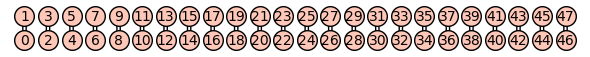

In [20]:
G_A1 = hole_diagramm(P_A1 * delta)
print(f"Has double edges: {G_A1.has_multiple_edges()}")
G_A1.plot(vertex_labels=True,layout='planar')

#### The Spherical 2-Design Test

In [21]:
result_A1 = sph_two_design_test(P_A1 * delta,c_A1 * delta)
print_result(result_A1)

Is spherical 1-design: True
Is spherical 2-design: True

Number of points of the Delauney Polytope: 48
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

The matrix of the spherical 2-design test:
[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0

-----------------------------------------------------------------------------------------------------------------------

### $A_2^{12}$ <a class="anchor" id="a_2"></a>

#### A note

Chapter 23 of SPLAG describes the shape of a representative deep hole of type $A_2^{12}$ and the shape of the vectors $u_0$, $v_0$, $w_0$, and $u_1$, $v_1$, $w_1$ which originate each from a component of the hole diagram of this deep hole.  It further explains that the remaining diagrams can be derived by permuting the coordinates of the vectors of the diagram component containing $u_1$, $v_1$,$w_1$, using an order-11 permutation that leaves $u_0$, $v_0$ and $w_0$ fixed.

We added concrete MOG coordinates for this shape and included the corresponding permutation, which can be found on page 50 of [Gr1998] (see the references of the Master's thesis and Appendix B).

#### The Data

$c_{A_2^{12}} = \frac{1}{\sqrt8} \cdot \frac{1}{3} \cdot \begin{array}{|cc|cc|cc|}
\hline 
10 & 0 &  2 &  0  & 2 &0 \\
0  & 2 &  0 &  2  & 0 &2  \\
0  & 2 &  0 &  2  & 0 &2  \\
0  & 2 &  0 &  2  & 0 &2  \\
\hline 
\end{array}$.

In [22]:
#The deep hole
c_A2 = vector([10/3,0,0,0,  0,2/3,2/3,2/3, 2/3,0,0,0,  0,2/3,2/3,2/3, 2/3,0,0,0, 0,2/3,2/3,2/3 ]) 

#Vertices of one A_2 diagramm
u_0 = zero_vector(24)
v_0 = vector([5,1,1,1,      1,1,1,1,  1,1,1,1,      1,1,1,1,  1,1,1,1,  1,1,1,1] )
w_0 = vector([5,-1,-1,-1,  -1,1,1,1,  1,-1,-1,-1,  -1,1,1,1,  1,-1,-1,-1,  -1,1,1,1])

#Vertices of another A_2 diagramm where the remaining A_2 diagramms are obtained 
# from permuting all the vectors under element of order 11 below from M12 (M24);
u_1 = vector([4,0,0,0,      0,0,0,0,   4,0,0,0,     0,0,0,0,   0,0,0,0,      0,0,0,0])
v_1 = vector([3,1,1,1,     -1,1,1,1,   -1,1,1,1,   -1,1,1,1,   1,-1,-1,-1,  -1,1,1,1])
w_1 = vector([3,-1,-1,-1,   1,1,1,1,  -1,-1,-1,-1,   1,1,1,1,  1,1,1,1,      1,1,1,1])

# The permuation
perm11 = [0,17,1,19,  4,7,15,13,  16,2,3,18,  9,8,22,21,  23,10,20,11,  12,5,6,14]

H = matrix([u_0,v_0,w_0, u_1,v_1,w_1])
for j in range(1,11):
    H = H.stack(matrix([act_perm(j,u_1, perm11),  act_perm(j,v_1, perm11),  act_perm(j,w_1, perm11) ]))
    
# Matrix which contain the first shell as column vectors
P_A2 = H.transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [23]:
print(leech_latt_controll_matrix(P_A2))

True


#### The Resulting Hole Diagram of the Data

Has double edges: False


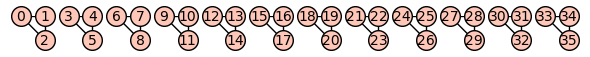

In [24]:
G_A2 = hole_diagramm(P_A2*delta)
print(f"Has double edges: {G_A2.has_multiple_edges()}")
G_A2.plot(vertex_labels=True,layout='planar')

#### The Spherical 2-Design Test

In [25]:
result_A2 = sph_two_design_test(P_A2 * delta,c_A2*delta)
print_result(result_A2)

Is spherical 1-design: True
Is spherical 2-design: True

Number of points of the Delauney Polytope: 36
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

The matrix of the spherical 2-design test:
[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0

-------------------------------------------------------------------------------------------------------------------------

### $A_3^{8}$ <a class="anchor" id="a_3"></a>

#### A typo in SPLAG

Chapter 23 of SPLAG gives a concrete representative $c_{A_3^{8}} = \frac{1}{\sqrt8} \cdot \begin{array}{|cc|cc|cc|}
\hline 
-1 & 1 &  2 &  0  & 2 &0 \\
1  & 1 &  0 &  0  & 0 &0  \\
1  & 1 &  0 &  0  & 0 &0  \\
1  & 1 &  0 &  0  & 0 &0  \\
\hline 
\end{array}$ for this type of deep hole and after giving the vertices of one $A_3$ diagram, they write that $c_{A_3^{8}}$ is also the center of
seven other $A_3$ diagram such as that below

||                      | |
|----------|----------------------|----------|
|  $\begin{array}{|cc|cc|cc|}
    \hline 
      0 & 2 &  2 &  2  & 2 &2 \\
     2  & 0 &  0 &  0  & 0 &0  \\
     2  & 0 &  0 &  0  & 0 &0  \\
     2  & 0 &  0 &  0  & 0 &0  \\
    \hline 
    \end{array} $ |----------------------| $ \begin{array}{|cc|cc|cc|}
    \hline 
    -2 & 0 &  2 &  2  & -2 &2 \\
     0  & 2 &  0 &  0  & 0 &0  \\
     0  & 2 &  0 &  0  & 0 &0  \\
     0  & 2 &  0 &  0  & 0 &0  \\
    \hline 
    \end{array} $ |    
|$ \begin{array}{ccc|ccc}
       &  &   &    &  & \\
       &  &   &    &  &  \\
    \end{array}$ |                      | $ \begin{array}{ccc|ccc}
       &  &   &    &  & \\
       &  &   &    &  &  \\
    \end{array} $|  
|  $ \begin{array}{|cc|cc|cc|}
    \hline 
    -2 & 0 &  2 &  2  & 2 &-2 \\
     0  & 2 &  0 &  0  & 0 &0  \\
     0  & 2 &  0 &  0  & 0 &0  \\
     0  & 2 &  0 &  0  & 0 &0  \\
    \hline 
    \end{array}  $  |----------------------|  $ \begin{array}{|cc|cc|cc|}
    \hline 
      0 & 2 &  2 &  2  & -2 &-2 \\
     2  & 0 &  0 &  0  & 0 &0  \\
     2  & 0 &  0 &  0  & 0 &0  \\
     2  & 0 &  0 &  0  & 0 &0  \\
    \hline 
    \end{array} $ |
    
    
(Fig. 23.4 in Chapter 23 of SPLAG) and which are based on octads meeting the left-hand octad of the MOG in four places and that the
others are the images of the one shown above under powers of the
permutation $\alpha$ given in Fig. 23.8 of this chapter.

Although the diagram is a (a component of a) hole diagram

Has double edges: False


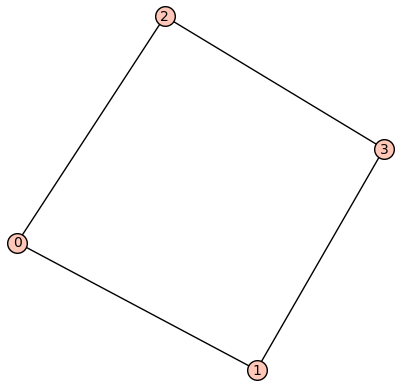

In [26]:
#The deep hole
c_A3 = delta*vector([-1,1,1,1, 1,1,1,1, 2,0,0,0, 0,0,0,0, 2,0,0,0, 0,0,0,0])
#The points o
l_up = delta*vector([ 0,2,2,2, 2,0,0,0, 2,0,0,0, 2,0,0,0, 2,0,0,0, 2,0,0,0])
l_down = delta*vector([-2,0,0,0, 0,2,2,2, 2,0,0,0, 2,0,0,0, 2,0,0,0, -2,0,0,0])
r_up = delta*vector([-2,0,0,0, 0,2,2,2, 2,0,0,0, 2,0,0,0, -2,0,0,0, 2,0,0,0]) #wrong
r_down = delta*vector([ 0,2,2,2, 2,0,0,0, 2,0,0,0, 2,0,0,0, -2,0,0,0, -2,0,0,0]) #wrong

comp_A3 = hole_diagramm(matrix([l_up, l_down, r_up, r_down]).transpose())
print(f"Has double edges: {comp_A3.has_multiple_edges()}")
comp_A3.plot(vertex_labels=True,layout='spring')

the points on the right side of the diagram do not have distance $\sqrt 2$ from the point $c_{A_3^{8}}$:

In [27]:
print("Left hand side:")
print((l_up -c_A3 ).norm())
print((l_down-c_A3 ).norm())
print("")
print("Right hand side:")
print((r_up-c_A3 ).norm())
print((r_down-c_A3 ).norm())

Left hand side:
sqrt(2)
sqrt(2)

Right hand side:
2
2


The correct diagram for our $c_{A_3^8}$ should be

||                      | |
|----------|----------------------|----------|
|  $\begin{array}{|cc|cc|cc|}
    \hline 
      0 & 2 &  2 &  2  & 2 &2 \\
     2  & 0 &  0 &  0  & 0 &0  \\
     2  & 0 &  0 &  0  & 0 &0  \\
     2  & 0 &  0 &  0  & 0 &0  \\
    \hline 
    \end{array} $ |----------------------| $ \begin{array}{|cc|cc|cc|}
    \hline 
    -2 & 0 &  2 &  -2  & 2 &2 \\
     0  & 2 &  0 &  0  & 0 &0  \\
     0  & 2 &  0 &  0  & 0 &0  \\
     0  & 2 &  0 &  0  & 0 &0  \\
    \hline 
    \end{array} $ |    
|$ \begin{array}{ccc|ccc}
       &  &   &    &  & \\
       &  &   &    &  &  \\
    \end{array}$ |                      | $ \begin{array}{ccc|ccc}
       &  &   &    &  & \\
       &  &   &    &  &  \\
    \end{array} $|  
|  $ \begin{array}{|cc|cc|cc|}
    \hline 
    -2 & 0 &  2 &  2  & 2 &-2 \\
     0  & 2 &  0 &  0  & 0 &0  \\
     0  & 2 &  0 &  0  & 0 &0  \\
     0  & 2 &  0 &  0  & 0 &0  \\
    \hline 
    \end{array}  $  |----------------------|  $ \begin{array}{|cc|cc|cc|}
    \hline 
      0 & 2 &  2 &  -2  & 2 &-2 \\
     2  & 0 &  0 &  0  & 0 &0  \\
     2  & 0 &  0 &  0  & 0 &0  \\
     2  & 0 &  0 &  0  & 0 &0  \\
    \hline 
    \end{array} $ |
    
where the signs of the two points on the right hand side of the diagram were slightly modificated.

In [28]:
w_1 = vector([-2,0,0,0, 0,2,2,2, 2,0,0,0,  -2,0,0,0, 2,0,0,0, 2,0,0,0])
v_1 = vector([ 0,2,2,2, 2,0,0,0, 2,0,0,0, -2,0,0,0, 2,0,0,0, -2,0,0,0])

Distance of the new points to the deep hole:
sqrt(2)
sqrt(2)
Has double edges: False


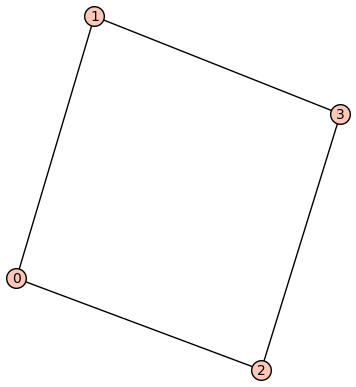

In [29]:
rr_up = delta * vector([-2,0,0,0, 0,2,2,2, 2,0,0,0,  -2,0,0,0, 2,0,0,0, 2,0,0,0])
rr_down = delta * vector([ 0,2,2,2, 2,0,0,0, 2,0,0,0, -2,0,0,0, 2,0,0,0, -2,0,0,0])
print("Distance of the new points to the deep hole:")
print((rr_up-c_A3).norm())
print((rr_down-c_A3).norm())

comp_A3 = hole_diagramm(matrix([l_up, l_down, rr_up, rr_down]).transpose())
print(f"Has double edges: {comp_A3.has_multiple_edges()}")
comp_A3.plot(vertex_labels=True,layout='spring')

#### The Data

$c_{A_3^{8}} = \frac{1}{\sqrt8} \cdot \begin{array}{|cc|cc|cc|}
\hline 
-1 & 1 &  2 &  0  & 2 &0 \\
1  & 1 &  0 &  0  & 0 &0  \\
1  & 1 &  0 &  0  & 0 &0  \\
1  & 1 &  0 &  0  & 0 &0  \\
\hline 
\end{array}$.

In [30]:
#The deep hole
c_A3 = vector([-1,1,1,1, 1,1,1,1, 2,0,0,0, 0,0,0,0, 2,0,0,0, 0,0,0,0])

#Vertices of one A_3 diagramm
x_0 = zero_vector(24)
u_0 = vector([-2,2,2,2, 2,2,2,2, 4,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0])
v_0 = vector([ 0,0,0,0, 0,0,0,0, 4,0,0,0, 0,0,0,0, 4,0,0,0, 0,0,0,0])
w_0 = vector([-2,2,2,2, 2,2,2,2, 0,0,0,0, 0,0,0,0, 4,0,0,0, 0,0,0,0])


#Corrected vertices of Fig. 23.4 of Chapter 23 of SPLAG where the remaining 6 A_3 diagramms 
#are obtained from permuting all the vectors under alpha
x_1 = vector([ 0,2,2,2, 2,0,0,0, 2,0,0,0, 2,0,0,0, 2,0,0,0, 2,0,0,0])
u_1 = vector([-2,0,0,0, 0,2,2,2, 2,0,0,0, 2,0,0,0, 2,0,0,0, -2,0,0,0])
w_1 = vector([-2,0,0,0, 0,2,2,2, 2,0,0,0,  -2,0,0,0, 2,0,0,0, 2,0,0,0])
v_1 = vector([ 0,2,2,2, 2,0,0,0, 2,0,0,0, -2,0,0,0, 2,0,0,0, -2,0,0,0])

#Permutation alpha Seitenzahl page 480 Fig.23.8
alpha = [0, 5, 7, 2, 3, 6, 4, 1] + [8, 13, 15, 10, 11, 14, 12, 9] + [16, 21, 23, 18, 19, 22, 20, 17]

H = matrix([x_0,u_0,v_0,w_0])
for j in range(0,7):
    H = H.stack(matrix([act_perm(j,x_1,alpha), act_perm(j,u_1,alpha), act_perm(j,v_1,alpha), act_perm(j,w_1,alpha)]))
    
#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A3 = H.transpose()


#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [31]:
leech_latt_controll_matrix(P_A3)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


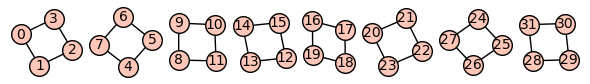

In [32]:
G_A3 = hole_diagramm(P_A3* delta)
print(f"Has double edges: {G_A3.has_multiple_edges()}")
G_A3.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [33]:
result_A3 = sph_two_design_test(P_A3* delta,c_A3* delta)
print_result(result_A3)

Is spherical 1-design: True
Is spherical 2-design: False

Number of points of the Delauney Polytope: 32
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

The matrix of the spherical 2-design test:
[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 

-----------------------------------------------------------------------------------------------------------------------

### $A_4^{6}$ <a class="anchor" id="a_4"></a>

#### The Data
$c_{A_4^{6}} = \frac{1}{\sqrt8} \cdot \frac{1}{5} \cdot \begin{array}{|cc|cc|cc|}
\hline 
4 & 4 &  2 &  6  & 6 &6 \\
8  & 4 &  2 &  2  & 2 &2  \\
4  & 4 &  6 &  2  & 2 &2  \\
4  & 4 &  6 &  2  & 2 &2  \\
\hline 
\end{array}$.

In [34]:
#The deep hole
c_A4 = (1/5) * vector([4,8,4,4, 4,4,4,4, 2,2,6,6, 6,2,2,2, 6,2,2,2, 6,2,2,2]) 

#Vertices of page 489 Fig. 23.5 a)
zero = zero_vector(24)
u_0 = vector([0,2,2,2,  0,2,2,2, 0,2,2,2, 2,0,0,0, 2,0,0,0, 2,0,0,0] )
v_0 = vector([1]*8 + [1]*1 + [-3]*1 + [1]*2 + [1]*12)
w_0 = vector([2,0,0,0,  2,0,0,0, 0,2,2,2, 2,0,0,0, 2,0,0,0, 2,0,0,0] )
x_0 = vector([1]*1 + [5]*1 + [1]*2 + [1]*20 )

#Vertices of page 489 Fig. 23.5 b) where the remaining 4 A_4 diagramms are obtained 
#from permuting all the vectors under perm_c
z_1 = vector([1]*8 + [-3]*1 + [1]*3 + [1]*12)
u_1 = vector([0,2,2,2,  2,0,0,0,  2,0,0,0,  2,0,0,0,  2,0,0,0,  2,0,0,0])
v_1 = vector([2,2,0,0,  0,0,2,2,  0,0,2,2,  2,2,0,0,  0,0,0,0,  0,0,0,0])
w_1 = vector([1]*8 + [1]*4 + [1]*1 + [-3]*1 + [1]*2 + [1]*8)
x_1 = vector([0,2,0,0,  0,2,0,0,  2,0,2,2,  0,2,0,0,  2,0,0,0,  2,0,0,0]) 

# and its images under the following element of order 5 in Co_0 page 488
#######################################################################################
perm_c = [0, 1, 3, 7, 4, 6, 2, 5] + [17, 9, 20, 12, 10, 18, 15, 23] + [11, 19, 14, 22, 16, 8, 21, 13]

H = matrix([zero,u_0,v_0,w_0,x_0])
for j in range(5):
    H = H.stack(matrix([act_perm(j,z_1, perm_c), act_perm(j,u_1,perm_c),act_perm(j,v_1,perm_c),act_perm(j,w_1,perm_c),act_perm(j,x_1,perm_c)]))
    
#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A4 = H.transpose()


#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [35]:
leech_latt_controll_matrix(P_A4)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


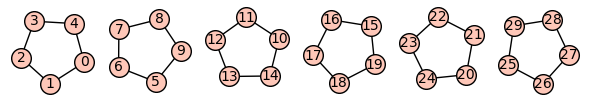

In [36]:
G_A4 = hole_diagramm(P_A4* delta)
print(f"Has double edges: {G_A4.has_multiple_edges()}")
G_A4.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [37]:
result_A4 = sph_two_design_test(P_A4* delta,c_A4* delta)
print_result(result_A4)

Is spherical 1-design: True
Is spherical 2-design: False

Number of points of the Delauney Polytope: 30
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

The matrix of the spherical 2-design test:
[21/10 -3/10  1/10  1/10  -2/5  1/10  1/10  1/10  -1/5  3/10 -1/10 -1/10 -1/10  3/10  3/10  3/10 -1/10  -1/5  3/10  -1/5 -1/10  -1/5  -1/5  3/10]
[-3/10 29/10   1/5   1/5 -3/10   1/5   1/5   1/5  1/10  -2/5  3/10  3/10  3/10  1/10  1/10  1/10  3/10  1/10  1/10  1/10  3/10  1/10  1/10  1/10]
[ 1/10   1/5 21/10  1/10  1/10  1/10  1/10  1/10  3/10  3/10 -1/10 -1/10 -1/10  -1/5  3/10  3/10 -1/10  -1/5  3/10  3/10   2/5  3/10  -1/5  -1/5]
[ 1/10   1/5  1/10 21/10  1/10  1/10  1/10  1/10  3/10  3/10 -1/10 -1/10 -1/10  -1/5  3/10  3/10   2/5  3/10  -1/5  -1/5 -1/10  -1/5  3/10  3/10]
[ -2/5 -3/10  1/10  1/10 21/10  1/10  1/10  1/10  3/10  3/10 -1/10 -1/10 -1/10  -1/5  -1/5  -1/5 -1

------------------------------------------------------------------------------------------------------------------------

 #### From now on, the points in the $A_n$ diagrams will follow a more uniform description (see the $A_n$-tree in Figure 23.9 of **SPLAG**). As in Chapter 23 of **SPLAG**, we define:

In [38]:
v_0 = zero_vector(24)
v_1 = vector([5]*1 + [1]*23)
v_2 = vector([4]*1 + [0]*7 + [-4]*1 + [0]*7 + [0]*8)
v_3 = vector([3]*1 + [-1]*7 + [1]*16)
v_4 = vector([1]*8 + [-3]*1 + [1]*7 + [1]*8)
v_5 = vector([4]*1 + [0]*7 + [0]*8 + [4]*1 + [0]*7)
v_6 = leech_diagramm_A(1,2,4)
v_7 = leech_diagramm_A(3,5,6)
v_8 = leech_diagramm_A(0,1,2)
v_9 = leech_diagramm_A(3,4,5)

In [39]:
z_1 = vector([4,0,0,0, 0,0,0,0, -2,0,2,0, 0,2,0,2, 2,0,2,0, 0,2,0,2]) 

z_2= vector([4,0,0,0, 0,0,0,0, -2,0,0,2, 0,2,2,0, 2,0,0,2, 0,2,2,0])

-----------------------------------------------------------------------------------------------------------------------

### $A_6^{4}$ <a class="anchor" id="a_6"></a>

#### The Data
$c_{A_6^{4}} = \frac{1}{\sqrt8} \cdot \frac{1}{7} \cdot \begin{array}{|cc|cc|cc|}
\hline 
21 & 1 &  -7 &  5  & 7 &3 \\
1  & 1 &  5 &  5  & 3 &3  \\
1  & 1 &  5 &  5  & 3 &3  \\
1  & 1 &  5 &  5  & 3 &3  \\
\hline 
\end{array}$.

In [40]:
#The deep hole
c_A6 = (1/7) * vector([21]*1 + [1]*7 + [-7]*1 + [5]*7 +[7]*1+ [3]*7)

#page 494 Fig. 23.10
#a)
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    vector([4]*1 + [0]*7 + [-2]*1 + [2]*7 + [0]*8) #v_6*
]

#b) Vertices of the other 3  A_6 diagramms
#Diagramm 1
u_vectors = [
    leech_diagramm_A(0,1,2),
    leech_diagramm_A(3,4,5),
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(0,5,6),
    leech_diagramm_A(1,2,3),
    leech_diagramm_A(4,5,6)
]

#Diagramm 2
x_vectors = [
    leech_diagramm_A(0,1,4),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(0,3,6),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(2,5,6)
]

#Diagramm 3
y_vectors = [
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(0,2,4),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(0,3,5),
    leech_diagramm_A(1,4,6)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors + y_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A6 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [41]:
leech_latt_controll_matrix(P_A6)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


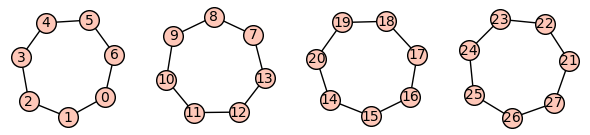

In [42]:
G_A6 = hole_diagramm(P_A6* delta)
print(f"Has double edges: {G_A6.has_multiple_edges()}")
G_A6.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [43]:
result_A6 = sph_two_design_test(P_A6* delta,c_A6* delta)
print_result(result_A6)

Is spherical 1-design: True
Is spherical 2-design: False

Number of points of the Delauney Polytope: 28
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

The matrix of the spherical 2-design test:
[   5/2      0      0      0      0      0      0      0    1/4    1/4    1/4    1/4    1/4    1/4    1/4    1/4    1/2      0      0      0      0      0      0      0]
[     0  41/14  -1/14  -1/14  -1/14  -1/14  -1/14  -1/14   -1/4 -17/28  11/28  -3/28  11/28  -3/28  -3/28  11/28      0    2/7    2/7  -3/14    2/7  -3/14  -3/14    2/7]
[     0  -1/14  41/14  -1/14  -1/14  -1/14  -1/14  -1/14   -1/4  -3/28 -17/28  11/28  11/28  11/28  -3/28  -3/28      0  -3/14    2/7    2/7    2/7    2/7  -3/14  -3/14]
[     0  -1/14  -1/14  41/14  -1/14  -1/14  -1/14  -1/14   -1/4  11/28  -3/28 -17/28  11/28  -3/28  11/28  -3/28      0    2/7  -3/14    2/7    2/7  -3/14    2/7  -3/14]
[  

-----------------------------------------------------------------------------------------------------------------------

### $A_8^{3}$ <a class="anchor" id="a_8"></a>

#### The Data
$c_{A_8^{3}} = \frac{1}{\sqrt8} \cdot \frac{1}{9} \cdot \begin{array}{|cc|cc|cc|}
\hline 
27 & 3 &  -9 &  3  & 9 &3 \\
1  & 1 &  5 &  5  & 7 &5  \\
1  & 1 &  5 &  5  & 7 &5  \\
1  & 1 &  5 &  5  & 7 &5  \\
\hline 
\end{array}$.

In [44]:
#The deep hole
c_A8 = (1/9) * vector([27,1,1,1, 3,1,1,1, -9,5,5,5, 3,5,5,5, 9,7,7,7, 3,5,5,5])

#Vertices of one A_8 diagramm p.494 Fig. 23.12
#a)
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    ##################
    vector([4,0,0,0, 0,0,0,0, -2,2,2,2, 0,0,0,0, 2,2,2,2, 0,0,0,0]) #v_8s 
    ##################
]

#b)
#Diagramm 1
u_vectors = [
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(4,5,6),
    leech_diagramm_A(1,2,3),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(2,4,6)
]
#Diagramm 2
x_vectors = [
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,4,5),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(1,2,6),
    leech_diagramm_A(3,4,5)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A8 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [45]:
leech_latt_controll_matrix(P_A8)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


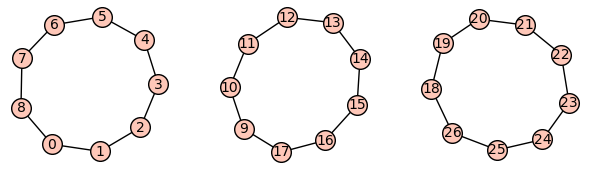

In [46]:
G_A8 = hole_diagramm(P_A8* delta)
print(f"Has double edges: {G_A8.has_multiple_edges()}")
G_A8.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [47]:
result_A8 = sph_two_design_test(P_A8* delta,c_A8* delta)
print_result(result_A8)

Is spherical 1-design: True
Is spherical 2-design: False

Number of points of the Delauney Polytope: 27
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

The matrix of the spherical 2-design test:
[  5/2     0     0     0     0     0     0     0   1/4   1/4   1/4   1/4     0     0     0     0   3/4   1/4   1/4   1/4     0     0     0     0]
[    0  17/6  -1/6  -1/6     0  -1/6   1/3  -1/6  -1/4  5/12  5/12 -7/12     0   1/6  -1/3   1/6  -1/4  1/12  1/12  7/12     0  -1/3   1/6   1/6]
[    0  -1/6  17/6  -1/6     0  -1/6  -1/6   1/3  -1/4 -7/12  5/12  5/12     0   1/6   1/6  -1/3  -1/4  7/12  1/12  1/12     0   1/6  -1/3   1/6]
[    0  -1/6  -1/6  17/6     0   1/3  -1/6  -1/6  -1/4  5/12 -7/12  5/12     0  -1/3   1/6   1/6  -1/4  1/12  7/12  1/12     0   1/6   1/6  -1/3]
[    0     0     0     0   5/2     0     0     0  -1/4   1/4   1/4   1/4   1/2     0     0     0  -

---------------------------------------------------------------------------------------------------------------------------

### $A_{12}^{2}$ <a class="anchor" id="a_12"></a>

#### A typo in SPLAG
In Chapter 23 of SPLAG in Fig.23.15 a) it is written that one of the points of the hole diagram for the deep hole $c_{A_{12}^{2}} = \frac{1}{\sqrt8} \cdot \frac{1}{13} \cdot \begin{array}{|cc|cc|cc|}
\hline 
39 & 3 &  -13 &  5  & 13 &5 \\
3  & 1 &  5 &  9  & 7 &9 \\
1  & 1 &  7 &  9  & 11 &7  \\
3  & 1 &  7 &  7  & 7 &9  \\
\hline 
\end{array}$ has to be $z_2 = \frac{1}{\sqrt8} \cdot \begin{array}{|cc|cc|cc|}
\hline 
4 & 0 &  -2 &  0  & 2 &0 \\
0  & 0 &  0 &  2  & 0 &2 \\
0  & 0 &  0 &  2  & 0 &2  \\
0  & 0 &  2 &  0  & 2 &0  \\
\hline 
\end{array}$. The same stands in Fig. 23.9. 

But then for example

In [48]:
c_A12 = (1/13) * delta * vector([39,3,1,3, 3,1,1,1, -13,5,7,7, 5,9,9,7, 13,7,11,7, 5,9,7,9])

print((c_A12-delta * z_2).norm())

2*sqrt(7/13)


And the components of the graph are not Coxeter-Dynkin diagrams.

Has double edges: False


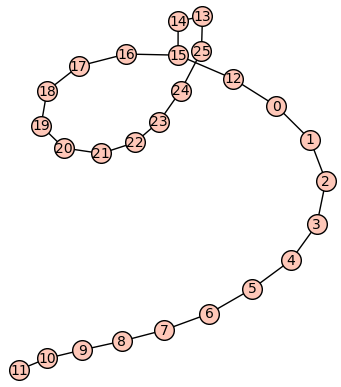

In [49]:
# The points given in Fig. 23.15 page 495 of SPLAG
all_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,4,5),
    ############################################
    z_2, #!
    ###################################
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(2,4,6)
]

G_wrong = hole_diagramm( Matrix(all_vectors).transpose()* delta)
print(f"Has double edges: {G_wrong.has_multiple_edges()}")
G_wrong.plot(vertex_labels=True,layout='spring')

Instead of $z_2$, it has to be $z_1 = \frac{1}{\sqrt8} \cdot \begin{array}{|cc|cc|cc|}
\hline 
4 & 0 &  -2 &  0  & 2 &0 \\
0  & 0 &  0 &  2  & 0 &2 \\
0  & 0 &  2 &  0 & 2 &0  \\
0  & 0 &  0 &  2  & 0 &2  \\
\hline 
\end{array}$.

#### The Data
$c_{A_{12}^{2}} = \frac{1}{\sqrt8} \cdot \frac{1}{13} \cdot \begin{array}{|cc|cc|cc|}
\hline 
39 & 3 &  -13 &  5  & 13 &5 \\
3  & 1 &  5 &  9  & 7 &9 \\
1  & 1 &  7 &  9  & 11 &7  \\
3  & 1 &  7 &  7  & 7 &9  \\
\hline 
\end{array}$.

In [50]:
#The deep hole
c_A12 = (1/13) * vector([39,3,1,3, 3,1,1,1, -13,5,7,7, 5,9,9,7, 13,7,11,7, 5,9,7,9])

z_1 = vector([4,0,0,0, 0,0,0,0, -2,0,2,0, 0,2,0,2, 2,0,2,0, 0,2,0,2]) 
z_2= vector([4,0,0,0, 0,0,0,0, -2,0,0,2, 0,2,2,0, 2,0,0,2, 0,2,2,0])

#Vertices of Fig. 23.15 a) with the correction of z_2 to z_1
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,4,5),
    ############################################
    z_1 # Instead of z_2 
    ###################################
]

#Vertices of Fig. 23.15 b)
u_vectors = [
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(2,4,6)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A12 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [51]:
leech_latt_controll_matrix(P_A12)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


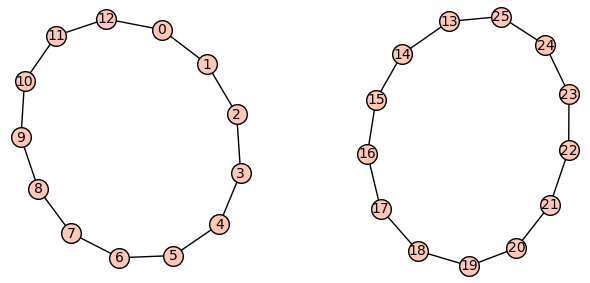

In [52]:
G_A12 = hole_diagramm(P_A12* delta)
print(f"Has double edges: {G_A12.has_multiple_edges()}")
G_A12.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [53]:
result_A12 = sph_two_design_test(P_A12* delta,c_A12* delta)
print_result(result_A12)

Is spherical 1-design: True
Is spherical 2-design: False

Number of points of the Delauney Polytope: 26
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

The matrix of the spherical 2-design test:
[   5/2      0      0      0      0      0      0      0    1/4      0    1/4      0      0    1/4      0    1/4    3/4      0    1/4      0      0    1/4      0    1/4]
[     0  67/26   5/26   1/13   1/13  -4/13  -4/13   5/26   -1/4   6/13   5/52  -2/13  -1/26  25/52   3/13   5/52   -1/4  -2/13  -7/52   9/26   6/13 -27/52  -2/13  -1/52]
[     0   5/26  71/26  -4/13  -4/13   3/13   3/13  -7/26   -1/4  -9/26  19/52   8/13   2/13  17/52   1/13 -33/52   -1/4   3/26  15/52   3/26  -9/26  17/52  -5/13  17/52]
[     0   1/13  -4/13  67/26   1/13   5/26  -4/13   5/26   -1/4   6/13   5/52   9/26  -1/26 -27/52  -7/26   5/52   -1/4   9/26  -7/52   9/26  -1/26  25/52  -2/13  -1/52]
[  

---------------------------------------------------------------------------------------------------------------------------------

### $A_7^{2}D_5^{2}$ <a class="anchor" id="a_7"></a>

#### The Data
$c_{A_{7}^{2}D_5^2} = \frac{1}{\sqrt8} \cdot \frac{1}{4} \cdot \begin{array}{|cc|cc|cc|}
\hline 
12 & 1 &  -4 &  2  & 4 &2 \\
1  & 0 &  3 &  3  & 3 &3 \\
1  & 0 &  2 &  2  & 2 &2  \\
1  & 0 &  2 &  2  & 2 &2  \\
\hline 
\end{array}$

In [54]:
#The deep hole
c_A7D5 = (1/4) * vector([12,1,1,1, 1,0,0,0, -4,3,2,2,  2,3,2,2, 4,3,2,2, 2,3,2,2])

#Vertices of Fig. 23.11 (a)
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    vector([4]*1 + [0]*7 + [-2]*1+[2]*1 + [0]*2 + [2]*2 + [0]*2 + [2]*2 + [0]*2 + [2]*2 + [0]*2) #v_7*
]

#Vertices of Fig. 23.11 (b)
##VA_7 diagramm
u_vectors = [
    leech_diagramm_A(0,1,2),
    leech_diagramm_A(4,5,6),
    leech_diagramm_A(1,2,3),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(1,2,6),
    leech_diagramm_A(3,4,5)
]

##D_5 diagramm
x_vectors = [
    leech_diagramm_A(0,1,4),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(2,4,6),
]

##Other D_5 diagramm
y_vectors = [
    leech_diagramm_A(2,4,5),
    leech_diagramm_A(0,2,4),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(1,4,6)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors + y_vectors 

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A7D5 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [55]:
leech_latt_controll_matrix(P_A7D5)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


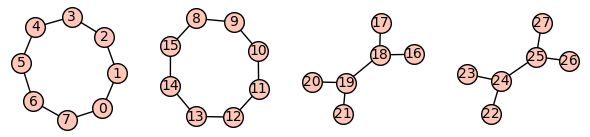

In [56]:
G_A7D5 = hole_diagramm(P_A7D5* delta)
print(f"Has double edges: {G_A7D5.has_multiple_edges()}")
G_A7D5.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [57]:
result_A7D5 = sph_two_design_test(P_A7D5* delta,c_A7D5* delta)
print_result(result_A7D5)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 28
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, 1/4*sqrt(2), 1/4*sqrt(2), 1/4*sqrt(2), 1/4*sqrt(2), 0, 0, -sqrt(2), 0, -1/4*sqrt(2), 0, 0, 1/2*sqrt(2), -1/4*sqrt(2), 0, 0, 0, -1/4*sqrt(2), 0, 0, 1/2*sqrt(2), -1/4*sqrt(2), 0, 0)

The matrix of the spherical 2-design test:
[   5/2      0      0      0      0      0      0      0    1/4    1/4      0      0    1/4    1/4      0      0    3/4    1/4      0      0    1/4    1/4      0      0]
[     0  87/32  -9/32   7/32  -9/32      0      0    1/8   -1/4   1/32    1/4   -1/4   3/16 -15/32   -1/4    1/4   -1/4   1/32    1/4    1/4   3/16   1/32    1/4    1/4]
[     0  -9/32  87/32  -9/32   7/32      0      0    1/8   -1/4   1/32    1/4    1/4   3/16   1/32    1/4   -1/4   -1/4 -15/32    1/4    1/4   3/16   1/32   -1/4    1/4]
[     0   7/32  -9/32  87/32  -9/32      0      0    1/8   -1

---------------------------------------------------------------------------------------------------------------------------------

### $A_9^{2}D_6$ <a class="anchor" id="a_9"></a>

#### The Data
$c_{A_{9}^{2}D_6} = \frac{1}{\sqrt8} \cdot \frac{1}{5} \cdot \begin{array}{|cc|cc|cc|}
\hline 
15 & 1 &  -5 &  2  & 5 &2 \\
1  & 0 &  3 &  3  & 3 &3 \\
1  & 0 &  2 &  4  & 3 &3  \\
1  & 1 &  2 &  3  & 3 &4  \\
\hline 
\end{array}$

In [58]:
#The deep hole
c_A9D6 = (1/5) * vector([ 15,1,1,1, 1,0,0,1, -5,3,2,2, 2,3,4,3, 5,3,3,3, 2,3,3,4]) 

#Fig 23.13 (a) p.495 
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    vector([4,0,0,0,   0,0,0,0,  -2,2,0,0,  0,0,2,2,   2,2,0,0,  0,0,2,2]) #v_9*
]

#Fig 23.13 (b) p.495 
##Vertices of the other A_9 diagramm
u_vectors = [
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,4,5),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(2,3,6)
]

##Vertices of the D_6 diagramm
x_vectors = [
    leech_diagramm_A(1,2,6),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,3),
    leech_diagramm_A(1,3,5)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A9D6 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [59]:
leech_latt_controll_matrix(P_A9D6)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


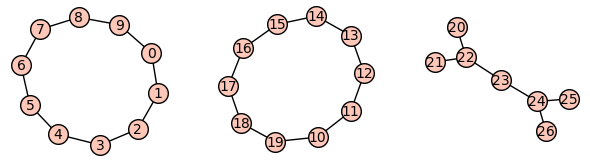

In [60]:
G_A9D6 = hole_diagramm(P_A9D6* delta)
print(f"Has double edges: {G_A9D6.has_multiple_edges()}")
G_A9D6.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [61]:
result_A9D6 = sph_two_design_test(P_A9D6* delta,c_A9D6* delta)
print_result(result_A9D6)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 27
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, -1/10*sqrt(2), -1/10*sqrt(2), -1/10*sqrt(2), 2/5*sqrt(2), -1/4*sqrt(2), -1/4*sqrt(2), 2/5*sqrt(2), 0, 1/5*sqrt(2), 1/20*sqrt(2), 1/20*sqrt(2), 1/20*sqrt(2), -3/10*sqrt(2), -3/20*sqrt(2), 1/5*sqrt(2), 0, -3/10*sqrt(2), 1/5*sqrt(2), 1/5*sqrt(2), 1/20*sqrt(2), -3/10*sqrt(2), 1/5*sqrt(2), -3/20*sqrt(2))

The matrix of the spherical 2-design test:
[    5/2       0       0       0       0       0       0       0     1/4     1/4       0       0       0       0     1/4     1/4     3/4     1/4       0       0       0       0     1/4     1/4]
[      0   69/25   -6/25   13/50   -1/25    3/20   -7/20   -1/25    -1/4  23/100  37/100 -13/100 -13/100    7/25   -9/25 -27/100    -1/4   3/100   12/25   -1/50  37/100  -11/50  23/100    7/50]
[      0   -6/25   69/25   -6/25   -1/25    3/20    3/20   -1/

------------------------------------------------------------------------------------------------------------------------

### $A_{11}D_7E_6 $ <a class="anchor" id="a_11"></a>

#### A typo in SPLAG
In Chapter 23 of SPLAG in Fig.23.14 a) it is written that one of the points of the hole diagram for the deep hole 
$c_{A_{11}D_7E_6} = \frac{1}{\sqrt8} \cdot \frac{1}{6} \cdot \begin{array}{|cc|cc|cc|}
\hline 
18 & 2 &  -6 &  2  & 6 &3 \\
1  & 0 &  3 &  4  & 3 &5 \\
1  & 0 &  3 &  4  & 4 &4  \\
1  & 1 &  3 &  3  & 4 &3  \\
\hline 
\end{array}$ has to be $z_1$. 

But then for example


In [62]:
c_A11D7E6 = delta * (1/6) * vector([ 18,1,1,1, 2,0,0,1, -6,3,3,3, 2,4,4,3, 6,3,4,4, 3,5,4,3])

print((c_A11D7E6-delta * z_1).norm())

sqrt(13/6)


And the components of the graph are not Coxeter-Dynkin diagrams.


Has double edges: False


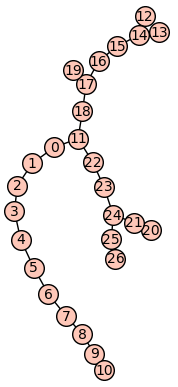

In [63]:
all_vectors = [
    zero_vector(24),
    vector([5]*1 + [1]*23),
    vector([4]*1 + [0]*7 + [-4]*1 + [0]*7 + [0]*8),
    vector([3]*1 + [-1]*7 + [1]*16),
    vector([1]*8 + [-3]*1 + [1]*7 + [1]*8),
    vector([4]*1 + [0]*7 + [0]*8 + [4]*1 + [0]*7),
    leech_diagramm_A(1,2,4),
    leech_diagramm_A(3,5,6),
    leech_diagramm_A(0,1,2),
    leech_diagramm_A(3,4,5),
    leech_diagramm_A(1,2,6),
    ##############################
    z_1, #!
    ###############################
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,3),
    leech_diagramm_A(1,2,5),
    ################################
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(2,4,5),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(2,5,6)
]

G_wrong = hole_diagramm(Matrix(all_vectors).transpose() * delta)
print(f"Has double edges: {G_wrong.has_multiple_edges()}")
G_wrong.plot(vertex_labels=True,layout='spring')

It has to be $z_2$.

#### The Data

In [64]:
# The deep hole
c_A11D7E6 = (1/6) * vector([ 18,1,1,1, 2,0,0,1, -6,3,3,3, 2,4,4,3, 6,3,4,4, 3,5,4,3])

#Vertices of Fig. 23.14 (a) A_11 diagramm
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(1,2,6),
    ##############################
    z_2 #instead of z_1
    ###############################
]

#Vertices of Fig. 23.14 (b)
## D_7 diagram
u_vectors = [
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,3),
    leech_diagramm_A(1,2,5)
]

##E_6 diagramm
x_vectors = [
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(2,4,5),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(2,5,6)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors
 
#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A11D7E6 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [65]:
leech_latt_controll_matrix(P_A11D7E6)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


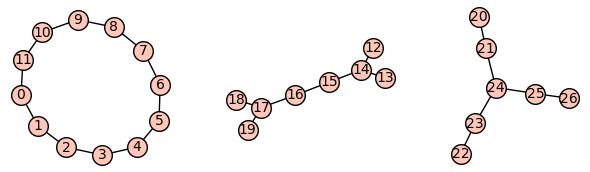

In [66]:
G_A11D7E6 = hole_diagramm(P_A11D7E6* delta)
print(f"Has double edges: {G_A11D7E6.has_multiple_edges()}")
G_A11D7E6.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [67]:
result_A11D7E6 = sph_two_design_test(P_A11D7E6* delta,c_A11D7E6* delta)
print_result(result_A11D7E6)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 27
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, -3/8*sqrt(2), 1/8*sqrt(2), 1/8*sqrt(2), 1/2*sqrt(2), -3/4*sqrt(2), 1/4*sqrt(2), 1/8*sqrt(2), 0, -1/8*sqrt(2), -1/8*sqrt(2), 3/8*sqrt(2), 0, -1/4*sqrt(2), 1/4*sqrt(2), -1/8*sqrt(2), 0, -1/8*sqrt(2), -1/4*sqrt(2), -1/4*sqrt(2), 3/8*sqrt(2), -3/8*sqrt(2), 1/4*sqrt(2), 3/8*sqrt(2))

The matrix of the spherical 2-design test:
[   5/2      0      0      0      0      0      0      0    1/4      0      0    1/4      0    1/4    1/4      0    3/4      0      0    1/4      0    1/4    1/4      0]
[     0  91/32   5/96   5/96  -7/24  -5/16   5/48   5/96   -1/4  43/96  -5/96  -3/32      0   7/48  -7/48  -5/96   -1/4  -5/96  19/48   7/48   5/32   3/32  -7/48   5/32]
[     0   5/96 265/96 -23/96    3/8  -1/16  -7/48 -23/96   -1/4   7/96  55/96   1/32    1/6  11/48  -1/16 -41/96   -1/4   7/96  -1/4

------------------------------------------------------------------------------------------------------------------------

### $A_{15} D_{9}$ <a class="anchor" id="a_15"></a>

#### A typo in SPLAG
In Fig. 23.16 (a) stands $z_1$ for one of the vertices of the hole diagram of $c_{A_{15}D_9} = \frac{1}{\sqrt8} \cdot \frac{1}{8} \cdot \begin{array}{|cc|cc|cc|}
\hline 
24 & 2 &  -8 &  3  & 8 &3 \\
1  & 1 &  4 &  7  & 4 &5 \\
1  & 0 &  4 &  6  & 5 &5  \\
2  & 1 &  4 &  4  & 5 &5  \\
\hline 
\end{array}$. Similar to the other cases it has to be $z_2$, which can seen for example from

In [68]:
c_A15D9 = delta * (1/8) * vector([ 24,1,1,2, 2,1,0,1, -8,4,4,4, 3,7,6,4, 8,4,5,5, 3,5,5,5])

print((c_A15D9-delta * z_1).norm())

1/2*sqrt(17/2)


#### The Data
$c_{A_{15}D_9} = \frac{1}{\sqrt8} \cdot \frac{1}{8} \cdot \begin{array}{|cc|cc|cc|}
\hline 
24 & 2 &  -8 &  3  & 8 &3 \\
1  & 1 &  4 &  7  & 4 &5 \\
1  & 0 &  4 &  6  & 5 &5  \\
2  & 1 &  4 &  4  & 5 &5  \\
\hline 
\end{array}$

In [69]:
# The deep hole
c_A15D9 = (1/8) * vector([ 24,1,1,2, 2,1,0,1, -8,4,4,4, 3,7,6,4, 8,4,5,5, 3,5,5,5])

#p.496 Fig. 23.16 (a) A_17 diagram 
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(1,4,5),
    #########################
    z_2
    ################
]
#p.496 Fig. 23.16 (b)
##Vertices D_9 diagramm
u_vectors = [
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(1,2,3),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(1,4,6)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A15D9 = Matrix(all_vectors).transpose()


#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [70]:
leech_latt_controll_matrix(P_A15D9)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


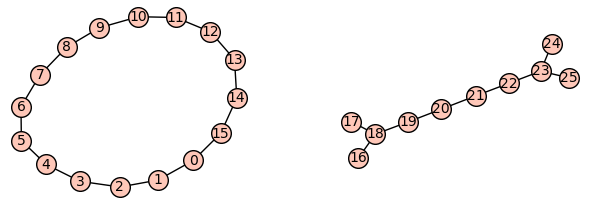

In [71]:
G_A15D9 = hole_diagramm(P_A15D9* delta)
print(f"Has double edges: {G_A15D9.has_multiple_edges()}")
G_A15D9.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [72]:
result_A15D9 = sph_two_design_test(P_A15D9* delta,c_A15D9* delta)
print_result(result_A15D9)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 26
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, -5/16*sqrt(2), 3/16*sqrt(2), -1/8*sqrt(2), 3/8*sqrt(2), 3/16*sqrt(2), -1/2*sqrt(2), 3/16*sqrt(2), 0, 1/4*sqrt(2), -1/4*sqrt(2), 1/4*sqrt(2), 1/16*sqrt(2), -3/16*sqrt(2), 1/8*sqrt(2), 1/4*sqrt(2), 0, -1/4*sqrt(2), -1/16*sqrt(2), -1/16*sqrt(2), 1/16*sqrt(2), -1/16*sqrt(2), -1/16*sqrt(2), -1/16*sqrt(2))

The matrix of the spherical 2-design test:
[     5/2        0        0        0        0        0        0        0      1/4        0        0      1/4        0      1/4      1/4        0      3/4        0        0      1/4        0      1/4      1/4        0]
[       0  701/256  -11/256   25/128  -75/128  -11/256    -7/32  117/256     -1/4     7/64    25/64    -9/64  -89/256   75/256    7/128     7/64     -1/4    -7/64   89/256   25/256   39/256 -103/256   25/256   89/256]
[       0  -1

-----------------------------------------------------------------------------------------------------------------------------

### $A_{17} E_7$ <a class="anchor" id="a_17"></a>

#### A typo in SPLAG
In Fig. 23.17 (a) stands $z_2$ for one of the vertices of the hole diagram of $c_{A_{17}E_7} = \frac{1}{\sqrt8} \cdot \frac{1}{9} \cdot \begin{array}{|cc|cc|cc|}
\hline 
27 & 2 &  -9 &  3  & 9 &4 \\
1  & 1 &  4 &  7  & 4 &6 \\
2  & 0 &  5 &  6  & 7 &5  \\
2  & 1 &  4 &  6  & 6 &5  \\
\hline 
\end{array}$. It has to be $z_1$, which can seen for example from

In [73]:
c_A17E7 = (1/9) * vector([ 27,1,2,2, 2,1,0,1, -9,4,5,4, 3,7,6,6, 9,4,7,6, 4,6,5,5])
print((delta * c_A17E7-z_2 * delta).norm())

1/3*sqrt(19)


#### The Data

In [74]:
# The deep hole
c_A17E7 = (1/9) * vector([ 27,1,2,2, 2,1,0,1, -9,4,5,4, 3,7,6,6, 9,4,7,6, 4,6,5,5])
#Vertices of p. 496 Fig.17 (a) A_17 diagramm with the correction
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,3),
    ##########
    z_1
    ##############
]

#Vertices of p. 496 Fig.17 (b) E_7 diagramm
u_vectors = [
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(0,3,4)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A17E7 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [75]:
leech_latt_controll_matrix(P_A17E7)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


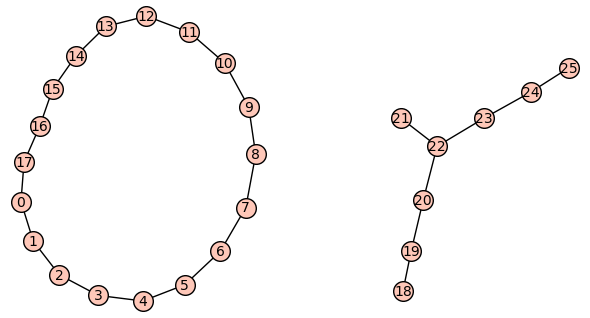

In [76]:
G_A17E7 = hole_diagramm(P_A17E7* delta)
print(f"Has double edges: {G_A17E7 .has_multiple_edges()}")
G_A17E7.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [77]:
result_A17E7 = sph_two_design_test(P_A17E7* delta,c_A17E7* delta)
print_result(result_A17E7)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 26
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, -2/9*sqrt(2), 1/18*sqrt(2), 1/18*sqrt(2), 1/18*sqrt(2), 5/18*sqrt(2), 0, -2/9*sqrt(2), 0, 1/9*sqrt(2), -1/9*sqrt(2), 1/9*sqrt(2), -1/6*sqrt(2), -1/18*sqrt(2), 1/6*sqrt(2), 1/6*sqrt(2), 0, 1/9*sqrt(2), -1/18*sqrt(2), 1/6*sqrt(2), 1/9*sqrt(2), -1/3*sqrt(2), -11/18*sqrt(2), 7/18*sqrt(2))

The matrix of the spherical 2-design test:
[     5/2        0        0        0        0        0        0        0      1/4        0      1/4        0        0      1/4        0      1/4      3/4        0      1/4        0        0      1/4        0      1/4]
[       0  443/162   31/162   -25/81   -25/81   -7/162        0    19/81     -1/4    31/81  119/324  -19/162    -2/27  181/324     2/27  -19/108     -1/4  -19/162  181/324     2/27  -19/162  -43/108  -17/162   29/324]
[       0   31/162  835/324  

--------------------------------------------------------------------------------------------------------------------------

### $E_{8}^3$ <a class="anchor" id="e_8"></a>

#### The Data
$c_{E_8^3} = \frac{1}{\sqrt8} \cdot \frac{1}{15} \cdot \begin{array}{|cc|cc|cc|}
\hline 
45 & 6 &  -15 &  6  & 15 &6 \\
1  & 2 &  8 &  7  & 10 &7 \\
4  & 2 &  8 &  10  & 10 &10  \\
1  & -1 &  8 &  10  & 10 &10  \\
\hline 
\end{array}$

In [78]:
# The deep hole
c_E8 = (1/15) * vector([ 45,1,4,1, 6,2,2,-1, -15,8,8,8, 6,7,10,10, 15,10,10,10, 6,7,10,10]) 

#p.505 Fig.23.28 (a)
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    leech_diagramm_A(1,2,4),
    leech_diagramm_A(3,5,6),
    leech_diagramm_A(3,4,6),
]

#p.505 Fig.23.28 (b)
##Vertices of the upper E_8 diagramm
u_vectors = [
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(1,2,6),
    leech_diagramm_A(3,4,5),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,4,5),
    leech_diagramm_A(1,3,6)
]

##Vertices of the lower E_8 diagramm
x_vectors = [
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,3),
    leech_diagramm_A(4,5,6),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(2,3,6)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_E8 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [79]:
leech_latt_controll_matrix(P_E8 )

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


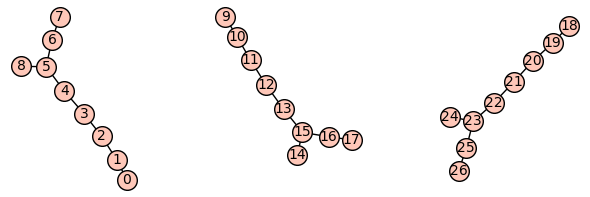

In [81]:
G_E8 = hole_diagramm(P_E8* delta)
print(f"Has double edges: {G_E8.has_multiple_edges()}")
G_E8.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [82]:
result_E8 = sph_two_design_test(P_E8* delta,c_E8* delta)
print_result(result_E8)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 27
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(-1/4*sqrt(2), -9/20*sqrt(2), 1/5*sqrt(2), -9/20*sqrt(2), 4/5*sqrt(2), 1/10*sqrt(2), 1/10*sqrt(2), -1/20*sqrt(2), 1/4*sqrt(2), -1/10*sqrt(2), -1/10*sqrt(2), -1/10*sqrt(2), 3/10*sqrt(2), 7/20*sqrt(2), 0, -1/2*sqrt(2), -3/4*sqrt(2), -1/2*sqrt(2), 0, 0, 3/10*sqrt(2), 7/20*sqrt(2), -1/2*sqrt(2), 0)

The matrix of the spherical 2-design test:
[    19/8    1/120     1/30    1/120     1/20     1/60     1/60   -1/120      3/8     1/15     1/15     1/15     1/20    7/120     1/12     1/12      5/8     1/12     1/12     1/12     1/20    7/120     1/12     1/12]
[   1/120  603/200   -1/150  -97/200   67/300   -1/300   -1/300 -149/600  -31/120    19/75    19/75  -37/150   -1/100  143/600     -1/4     1/60     1/40     1/60      1/4      1/4   -1/100 -157/600     1/60      1/4]
[    1/30   -1/150   20

-----------------------------------------------------------------------------------------------------------------------

### $E_6^4$ <a class="anchor" id="e_6"></a>

#### The Data
$c_{E_6^4} = \frac{1}{\sqrt8} \cdot \frac{1}{6} \cdot \begin{array}{|cc|cc|cc|}
\hline 
18 & 3 &  -6 &  4  & 4 &4 \\
1  & 0 &  5 &  3  & 3 &3 \\
1  & 0 &  5 &  3  & 3 &3  \\
1  & 0 &  5 &  3  & 3 &3  \\
\hline 
\end{array}$

In [83]:
# The deep hole
c_E6 = (1/6) * vector([ 18,1,1,1, 3,0,0,0, -6,5,5,5, 4,3,3,3, 4,3,3,3, 4,3,3,3])
z_3 = vector([2,0,0,0, 2,0,0,0, 0,2,2,2, 2,0,0,0, 2,0,0,0, 2,0,0,0])

#p.505 Fig.23.29 (a)
##Vertices of the upper E_6 diagramm
v_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    z_3,
    leech_diagramm_A(1,2,4)
]

##Vertices of the lower E_6 diagramm
u_vectors = [
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(0,2,4),
    leech_diagramm_A(1,5,6),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(2,4,5)
]

#p.505 Fig.23.29 (b)
##Vertices of the upper E_6 diagramm
x_vectors = [
    leech_diagramm_A(1,2,6),
    leech_diagramm_A(3,4,5),
    leech_diagramm_A(0,1,2),
    leech_diagramm_A(3,4,6),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(4,5,6),
    leech_diagramm_A(1,2,3)
]

##Vertices of the lower E_6 diagramm
y_vectors = [
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(0,1,4),
    leech_diagramm_A(2,3,5),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(1,3,4)
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors + y_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_E6 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [84]:
leech_latt_controll_matrix(P_E6)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


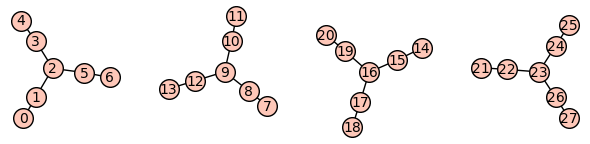

In [85]:
G_E6 = hole_diagramm(P_E6* delta)
print(f"Has double edges: {G_E6.has_multiple_edges()}")
G_E6.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [86]:
result_E6 = sph_two_design_test(P_E6* delta,c_E6* delta)
print_result(result_E6)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 28
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(-3/4*sqrt(2), 1/12*sqrt(2), 1/12*sqrt(2), 1/12*sqrt(2), 5/4*sqrt(2), -1/4*sqrt(2), -1/4*sqrt(2), -1/4*sqrt(2), 1/4*sqrt(2), -7/12*sqrt(2), -7/12*sqrt(2), -7/12*sqrt(2), 1/12*sqrt(2), 1/4*sqrt(2), 1/4*sqrt(2), 1/4*sqrt(2), 1/12*sqrt(2), 1/4*sqrt(2), 1/4*sqrt(2), 1/4*sqrt(2), 1/12*sqrt(2), 1/4*sqrt(2), 1/4*sqrt(2), 1/4*sqrt(2))

The matrix of the spherical 2-design test:
[  19/8   1/16   1/16   1/16  -1/16      0      0      0    1/8   1/16   1/16   1/16      0   3/16   3/16   3/16      0   3/16   3/16   3/16      0   3/16   3/16   3/16]
[  1/16 217/72   1/72   1/72  -7/24  -5/48  -5/48  -5/48 -13/48  -7/72  -7/72  -7/72 29/144   1/24   1/24   1/24 29/144   1/24   1/24   1/24 29/144   1/24   1/24   1/24]
[  1/16   1/72 217/72   1/72  -7/24  -5/48  -5/48  -5/48 -13/48  -7/72  -7/72  -7/72 2

-----------------------------------------------------------------------------------------------------------------------

### $A_{24}$ <a class="anchor" id="a_24"></a>

#### A mistake in SPLAG
Again $z_1$ and $z_2$ have to be swapped.

On p.506, in the proof of Theorem 25, it is written that the center of the fourth $A_{24}$ diagram in the $A_n$-tree in Fig. 23.9 is 
$c_{A_{24}} = \frac{1}{\sqrt8} \cdot \frac{1}{25} \cdot \begin{array}{|cc|cc|cc|}
\hline 
75 & 7 & -25 &   9  & 25 &11 \\
3  & 1 &  13 &  17  & 13 &17 \\
5  & 1 &  13 &  15  & 23 &13  \\
5  & 3 &  11 &  15  & 15 &15  \\
\hline 
\end{array}$.
With the remark on p. 485, one calculates that the center of the fourth $A_{24}$ diagram is actually

In [87]:
#Vertices of fourth A_24 diagramm p.491 Fig.23.9; z_1 has to be changed to z_2
fourth_col = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,5),
    z_2
]
P_A24_col4 = Matrix(fourth_col).transpose()


In [88]:
leech_latt_controll_matrix(P_A24_col4 )

True

Has double edges: False


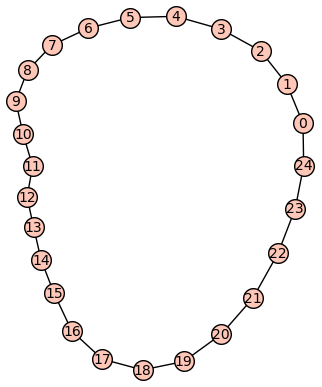

In [89]:
G_A24 = hole_diagramm(P_A24_col4* delta)
print(f"Has double edges: {G_A24.has_multiple_edges()}")
G_A24.plot(vertex_labels=True,layout='spring')


In [90]:
print("The deep hole of this diagram scaled by 25*sqrt(8):")
print(vec_to_mog_translater(sum(fourth_col)))

The deep hole of this diagram scaled by 25*sqrt(8):
[ 75   5 -25   9  25  11]
[  5   3   9  19  11  17]
[  3   1  13  19  17  15]
[  7   1  13  15  17  15]


And $c_{A_{24}} = \frac{1}{\sqrt8} \cdot \frac{1}{25} \cdot \begin{array}{|cc|cc|cc|}
\hline 
75 & 7 & -25 &   9  & 25 &11 \\
3  & 1 &  13 &  17  & 13 &17 \\
5  & 1 &  13 &  15  & 23 &13  \\
5  & 3 &  11 &  15  & 15 &15  \\
\hline 
\end{array}$ is actually the deep hole of the second $A_{24}$ diagram.

#### The Data

In [91]:
# The deep hole
c_A24 = (1/25) * vector([75,3,5,5, 7,1,1,3, -25,13,13,11, 9,17,15,15, 25,13,23,15, 11,17,13,15]) 

#Vertices of second A_24 diagramm p.491 Fig.23.9 z_2 has to be changed to z_1
all_vectors = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(1,2,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,3),
    z_1
]

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A24 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [92]:
leech_latt_controll_matrix(P_A24 )

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


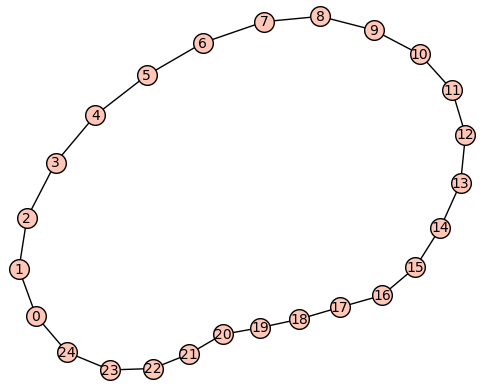

In [95]:
G_A24 = hole_diagramm(P_A24* delta)
print(f"Has double edges: {G_A24.has_multiple_edges()}")
G_A24.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [96]:
result_A24 = sph_two_design_test(P_A24* delta,c_A24* delta)
print_result(result_A24)

Is spherical 1-design: True
Is spherical 2-design: False

Number of points of the Delauney Polytope: 25
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

The matrix of the spherical 2-design test:
[    5/2       0       0       0       0       0       0       0     1/4       0     1/4       0       0     1/4       0     1/4     3/4       0     1/4       0       0     1/4       0     1/4]
[      0  129/50    3/10    -1/5    1/50   -7/50   -7/50    2/25    -1/4   17/25  43/100  -27/50  -13/50  37/100   -1/10    3/20    -1/4   -8/25   3/100     2/5   23/50 -13/100   -8/25    3/20]
[      0    3/10     5/2       0     1/5    -2/5    1/10    -1/5    -1/4    -1/5    1/20     3/5     2/5   -1/20       0    -3/4    -1/4    3/10    1/20       0    1/10    9/20    -1/5     1/4]
[      0    -1/5       0     5/2   -3/10     3/5    -2/5    3/10    -1/4    3/10    1/20     3/5   -1

------------------------------------------------------------------------------------------------------------------------

### $A_n$-tree

Controll of the main branches of the $A_n$-tree on p.491 **SPLAG** with the necessary relabeling of $z_1$ and $z_2$.

All points are from the Leech lattice: True
Has double edges: False


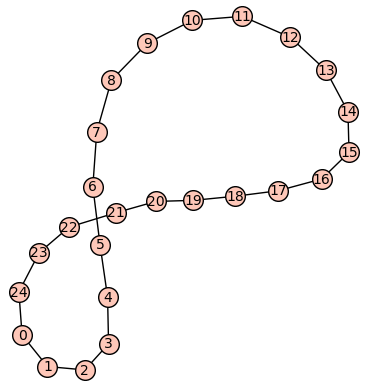

In [97]:
col1 = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(1,2,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(0,2,5),    
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(2,4,5),
    z_1
]

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_col1 = Matrix(col1).transpose()
print(f"All points are from the Leech lattice: {leech_latt_controll_matrix(P_col1)}")
G_A24 = hole_diagramm(P_col1* delta)
print(f"Has double edges: {G_A24.has_multiple_edges()}")
G_A24.plot(vertex_labels=True,layout='spring')

All points are from the Leech lattice: True
Has double edges: False


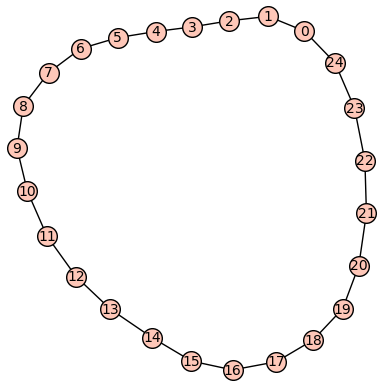

In [99]:
col2 = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(1,2,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),    
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,3),
    z_1
]

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_col2 = Matrix(col2).transpose()
print(f"All points are from the Leech lattice: {leech_latt_controll_matrix(P_col2)}")
G_A24 = hole_diagramm(P_col2* delta)
print(f"Has double edges: {G_A24.has_multiple_edges()}")
G_A24.plot(vertex_labels=True,layout='spring')

All points are from the Leech lattice: True
Has double edges: False


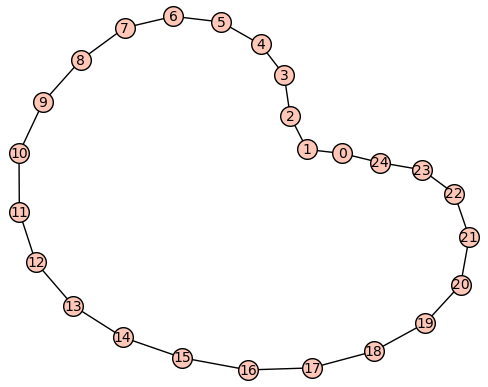

In [100]:
col3 = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(1,2,5),    
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,3),
    z_1
]

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_col3 = Matrix(col3).transpose()
print(f"All points are from the Leech lattice: {leech_latt_controll_matrix(P_col3)}")
G_A24 = hole_diagramm(P_col3* delta)
print(f"Has double edges: {G_A24.has_multiple_edges()}")
G_A24.plot(vertex_labels=True,layout='spring')

All points are from the Leech lattice: True
Has double edges: False


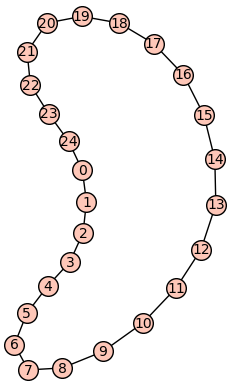

In [102]:
col4 = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,3,4),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,4,6),    
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,5),
    z_2
]

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_col4 = Matrix(col4).transpose()
print(f"All points are from the Leech lattice: {leech_latt_controll_matrix(P_col4)}")
G_A24 = hole_diagramm(P_col4* delta)
print(f"Has double edges: {G_A24.has_multiple_edges()}")
G_A24.plot(vertex_labels=True,layout='spring')

All points are from the Leech lattice: True
Has double edges: False


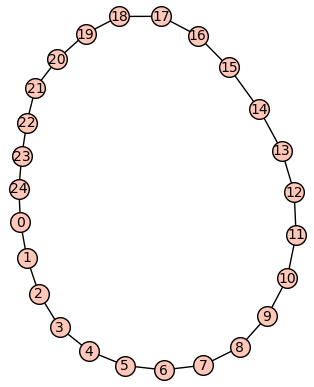

In [105]:
col5 = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,4,5),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,3,4),
    leech_diagramm_A(2,5,6),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(0,1,5),    
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(1,4,5),
    z_2
]

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_col5 = Matrix(col5).transpose()
print(f"All points are from the Leech lattice: {leech_latt_controll_matrix(P_col5)}")
G_A24 = hole_diagramm(P_col5* delta)
print(f"Has double edges: {G_A24.has_multiple_edges()}")
G_A24.plot(vertex_labels=True,layout='spring')

All points are from the Leech lattice: True
Has double edges: False


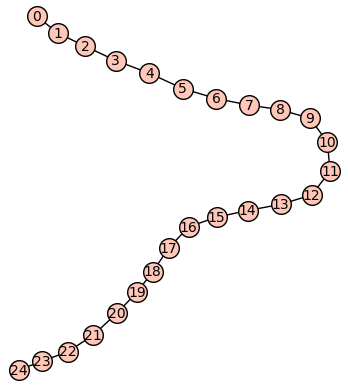

In [108]:
col6 = [
    v_0,
    v_1,
    v_2,
    v_3,
    v_4,
    v_5,
    v_6,
    v_7,
    v_8,
    v_9,
    leech_diagramm_A(0,1,6),
    leech_diagramm_A(2,4,5),
    leech_diagramm_A(1,3,6),
    leech_diagramm_A(0,2,5),
    leech_diagramm_A(1,4,6),
    leech_diagramm_A(0,2,3),
    leech_diagramm_A(1,4,5),
    leech_diagramm_A(2,3,6),
    leech_diagramm_A(0,1,5),
    leech_diagramm_A(2,4,6),
    leech_diagramm_A(1,3,5),
    leech_diagramm_A(0,4,6),    
    leech_diagramm_A(1,2,5),
    leech_diagramm_A(0,3,4),
    leech_diagramm_A(2,5,6)
]

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_col6 = Matrix(col6).transpose()
print(f"All points are from the Leech lattice: {leech_latt_controll_matrix(P_col6)}")
G_A24 = hole_diagramm(P_col6* delta)
print(f"Has double edges: {G_A24.has_multiple_edges()}")
G_A24.plot(vertex_labels=True,layout='spring')

------------------------------------------------------------------------------------------------------------------------

### $D_4^{6}$ <a class="anchor" id="d_4"></a>

#### The Data
 $c_{D_{4}^6} = \frac{1}{\sqrt8} \cdot \frac{1}{3} \cdot \begin{array}{|cc|cc|cc|}
\hline 
2  & 2 & 2 &  2  & 2 &2 \\
4  & 2 & 2 &  2  & 2 &2 \\
4  & 4 & 2 &  2  & 2 &2  \\
4  & 2 & 2 &  2  & 2 &2  \\
\hline 
\end{array}$ 

In [109]:
# The deep hole
c_D4 = (1/3) * vector([2,4,4,4, 2,2,4,2, 2,2,2,2, 2,2,2,2, 2,2,2,2, 2,2,2,2])

#p.500 Fig.23.21
##Top left
v_vectors = [
    leech_d("emp","p"),
    leech_d("I","h"),
    leech_d("II","h"),
    leech_d("III","h"),
    leech_d("8","h")
]
##Bottom left
u_vectors = [
    leech_d("2","p"),
    leech_d("82","l"),
    leech_d("82.01.34","p"),
    leech_d("82.03.14","p"),
    leech_d("82.04.13","p")
]

##Top middle
x_vectors = [
    leech_d("0","p"),
    leech_d("80","l"),
    leech_d("80.12.34","p"),
    leech_d("80.13.24","p"),
    leech_d("80.14.23","p")
]
##Bottom middle
y_vectors = [
    leech_d("3","p"),
    leech_d("83","l"),
    leech_d("83.01.24","p"),
    leech_d("83.02.14","p"),
    leech_d("83.04.12","p")
]
##Top right
z_vectors = [
    leech_d("1","p"),
    leech_d("81","l"),
    leech_d("81.02.34","p"),
    leech_d("81.03.24","p"),
    leech_d("81.04.23","p")
]
##bottom right
k_vectors = [
    leech_d("4","p"),
    leech_d("84","l"),
    leech_d("84.01.23","p"),
    leech_d("84.02.13","p"),
    leech_d("84.03.12","p")

]
# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors + y_vectors + z_vectors + k_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_D4 = Matrix(all_vectors).transpose()


#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [110]:
leech_latt_controll_matrix(P_D4)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


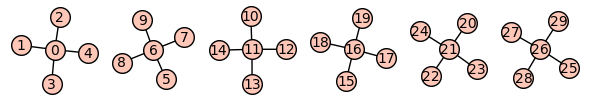

In [111]:
G_D4 = hole_diagramm(P_D4* delta)
print(f"Has double edges: {G_D4.has_multiple_edges()}")
G_D4.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [112]:
result_D4 = sph_two_design_test(P_D4* delta,c_D4* delta)
print_result(result_D4)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 30
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(1/2*sqrt(2), -1/2*sqrt(2), -1/2*sqrt(2), -1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), -1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2))

The matrix of the spherical 2-design test:
[5/2   0   0   0 1/2 1/2   0 1/2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0 5/2 1/2 1/2   0   0 1/2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0 1/2 5/2 1/2   0   0 1/2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0 1/2 1/2 5/2   0   0 1/2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[1/2   0   0   0 5/2 1/2   0 1/2   0   0   0  

------------------------------------------------------------------------------------------------------------------------

### $A_5^4 D_4$ <a class="anchor" id="a_5"></a>

#### A typo in SPLAG

The center for the diagram $A_5^4 D_4$ on p.500 Fig. 23.22 is given as  $c_{A_{5}^4 D_4} = \frac{1}{\sqrt8} \cdot \frac{1}{6} \cdot \begin{array}{|cc|cc|cc|}
\hline 
5  & 3 & 5 &  3  & 3 &3 \\
9  & 3 & 5 &  3  & 3 &3 \\
9  & 3 & 3 &  5  & 5 &5  \\
9  & 3 & 3 &  5  & 5 &5  \\
\hline 
\end{array}$ .

The vertice $[\hat{\infty}]$ of the $D_4$ component has to be $[\hat{I}]$, which can be seen either by looking at the resulting hole diagram defined through these vertices or just the center that would result if it were correct.

In [113]:
# The deep hole
c_A5D4 = (1/6) * vector([5,9,9,9, 3,3,3,3, 5,5,3,3, 3,3,5,5, 3,3,5,5, 3,3,5,5])

#p.500 Fig.23.22 (a)
##Vertices of D_4 diagramm
v_vectors = [
    leech_d("emp","p"),
    leech_d("Omega","p"),
    leech_d("II","h"),
    leech_d("III","h"),
    leech_d("8","h") 
]

#p.500 Fig.23.22 (b)
#Vertices o
u_vectors = [
    leech_d("8|01234","l"),
    leech_d("82.04.13","p"),
    leech_d("13","l"),
    leech_d("80.13.24","p"),
    leech_d("24","l"),
    leech_d("83.01.24","p")
]

#Vertices of A_5 diagramm
x_vectors = [
    leech_d("8|01324","l"),
    leech_d("82.01.34","p"),
    leech_d("34","l"),
    leech_d("80.12.34","p"),
    leech_d("12","l"),
    leech_d("83.04.12","p")
]

#Vertices of A_5 diagramm
y_vectors = [
    leech_d("8","p"),
    leech_d("81","l"),
    leech_d("81.04.23","p"),
    leech_d("23","l"),
    leech_d("84.01.23","p"),
    leech_d("84","l")
]

#Vertices of A_5 diagramm
z_vectors = [
    leech_d("0","p"),
    leech_d("02","l"),
    leech_d("83.02.14","p"),
    leech_d("14","l"),
    leech_d("82.03.14","p"),
    leech_d("03","l")
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors + y_vectors + z_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A5D4 = Matrix(all_vectors).transpose()

In [114]:
center = sum(all_vectors) + leech_d("emp","p")
print("The would be center scaled by sqrt(8)*6")
print(vec_to_mog_translater(center/5))

The would be center scaled by sqrt(8)*6
[   5    3    5    3    3    3]
[41/5    3    5    3    3    3]
[   9 19/5    3    5    5    5]
[   9    3    3    5    5    5]


In [115]:
leech_latt_controll_matrix(P_A5D4)

True

The hole diagram is not the hole diagram of a hole of $\Lambda_{24}:$

Has double edges: True


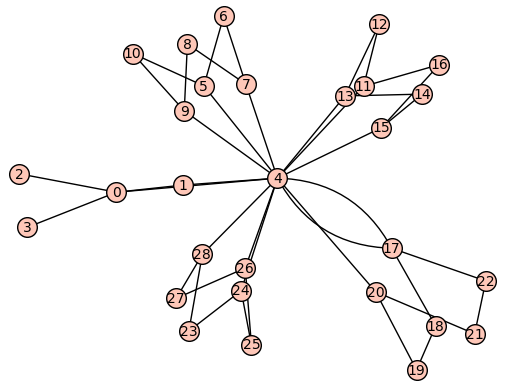

In [116]:
G_A5D4 = hole_diagramm(P_A5D4* delta)
print(f"Has double edges: {G_A5D4.has_multiple_edges()}")
G_A5D4.plot(vertex_labels=True,layout='spring')

#### The Data
 $c_{A_{5}^4 D_4} = \frac{1}{\sqrt8} \cdot \frac{1}{6} \cdot \begin{array}{|cc|cc|cc|}
\hline 
5  & 3 & 5 &  3  & 3 &3 \\
9  & 3 & 5 &  3  & 3 &3 \\
9  & 3 & 3 &  5  & 5 &5  \\
9  & 3 & 3 &  5  & 5 &5  \\
\hline 
\end{array}$ 

In [117]:
# The deep hole
c_A5D4 = (1/6) * vector([5,9,9,9, 3,3,3,3, 5,5,3,3, 3,3,5,5, 3,3,5,5, 3,3,5,5])

#p.500 Fig.23.22 (a)
##Vertices of D_4 diagramm
v_vectors = [
    leech_d("emp","p"),
    leech_d("Omega","p"),
    leech_d("II","h"),
    leech_d("III","h"),
    leech_d("I","h") # the correction instead of leech_d("8","h") 
]

#p.500 Fig.23.22 (b)
##Vertices of Top A_5 diagramm
u_vectors = [
    leech_d("8|01234","l"),
    leech_d("82.04.13","p"),
    leech_d("13","l"),
    leech_d("80.13.24","p"),
    leech_d("24","l"),
    leech_d("83.01.24","p")
]

##Vertices of second top A_5 diagramm
x_vectors = [
    leech_d("8|01324","l"),
    leech_d("82.01.34","p"),
    leech_d("34","l"),
    leech_d("80.12.34","p"),
    leech_d("12","l"),
    leech_d("83.04.12","p")
]

##Vertices of third A_5 diagramm
y_vectors = [
    leech_d("8","p"),
    leech_d("81","l"),
    leech_d("81.04.23","p"),
    leech_d("23","l"),
    leech_d("84.01.23","p"),
    leech_d("84","l")
]

##Vertices of last A_5 diagramm
z_vectors = [
    leech_d("0","p"),
    leech_d("02","l"),
    leech_d("83.02.14","p"),
    leech_d("14","l"),
    leech_d("82.03.14","p"),
    leech_d("03","l")
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors + y_vectors + z_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_A5D4 = Matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [118]:
leech_latt_controll_matrix(P_A5D4)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


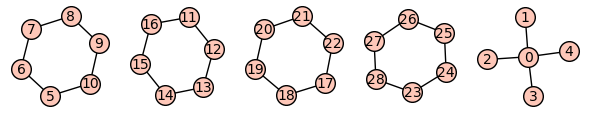

In [119]:
G_A5D4 = hole_diagramm(P_A5D4* delta)
print(f"Has double edges: {G_A5D4.has_multiple_edges()}")
G_A5D4.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [120]:
result_A5D4 = sph_two_design_test(P_A5D4* delta,c_A5D4* delta)
print_result(result_A5D4)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 29
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(5/24*sqrt(2), 3/8*sqrt(2), 3/8*sqrt(2), 3/8*sqrt(2), 1/8*sqrt(2), 1/8*sqrt(2), 1/8*sqrt(2), 1/8*sqrt(2), 5/24*sqrt(2), 5/24*sqrt(2), 1/8*sqrt(2), 1/8*sqrt(2), 1/8*sqrt(2), 1/8*sqrt(2), 5/24*sqrt(2), 5/24*sqrt(2), 1/8*sqrt(2), 1/8*sqrt(2), 5/24*sqrt(2), 5/24*sqrt(2), 1/8*sqrt(2), 1/8*sqrt(2), 5/24*sqrt(2), 5/24*sqrt(2))

The matrix of the spherical 2-design test:
[485/288    1/32    1/32    1/32  -23/96  -23/96  -23/96  -23/96  53/288  53/288   25/96   25/96   25/96   25/96  53/288  53/288   25/96   25/96  53/288  53/288   25/96   25/96  53/288  53/288]
[   1/32   85/32   21/32   21/32   -1/32   -1/32   -1/32   -1/32    1/32    1/32   -1/32   -1/32   -1/32   -1/32    1/32    1/32   -1/32   -1/32    1/32    1/32   -1/32   -1/32    1/32    1/32]
[   1/32   21/32   85/32   21/32   -1/32   -1

-----------------------------------------------------------------------------------------------------------------------

### $D_6^4$ <a class="anchor" id="d_6"></a>

#### The Data
 $c_{D_{6}^4} = \frac{1}{\sqrt8} \cdot \frac{1}{5} \cdot \begin{array}{|cc|cc|cc|}
\hline 
3  & 3 & 3 &  3  & 3 &3 \\
7  & 3 & 3 &  3  & 3 &3 \\
7  & 3 & 3 &  3  & 5 &5  \\
7  & 3 & 3 &  3  & 5 &5  \\
\hline 
\end{array}$ 

In [121]:
# The deep hole
c_D6 = (1/5) * vector([3,7,7,7, 3,3,3,3, 3,3,3,3, 3,3,3,3, 3,3,5,5, 3,3,5,5])

#p.501 Fig.2 3.23
## (a) top
v_vectors = [
    leech_d("emp","p"),
    leech_d("I","h"),
    leech_d("II","h"),
    leech_d("III","h"),
    leech_d("C","p"),
    leech_d("8","p"),
    leech_d("0","p")
]

## (a) bottom
u_vectors = [
    leech_d("82.04.13","p"),
    leech_d("13","l"),
    leech_d("84.02.13","p"),
    leech_d("80.13.24","p"),
    leech_d("24","l"),
    leech_d("81.03.24","p"),
    leech_d("83.01.24","p")
]

## (b) top
x_vectors = [
    leech_d("81.04.23","p"),
    leech_d("23","l"),
    leech_d("84.01.23","p"),
    leech_d("80.14.23","p"),
    leech_d("14","l"),
    leech_d("82.03.14","p"),
    leech_d("83.02.14","p")
]

## (b) bottom
y_vectors = [
    leech_d("83.04.12","p"),
    leech_d("12","l"),
    leech_d("84.03.12","p"),
    leech_d("80.12.34","p"),
    leech_d("34","l"),
    leech_d("81.02.34","p"),
    leech_d("82.01.34","p")
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors + y_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_D6 = Matrix(all_vectors).transpose()


#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [122]:
leech_latt_controll_matrix(P_D6)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


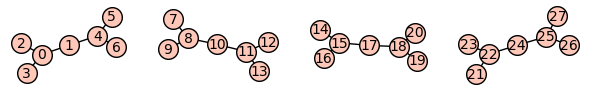

In [123]:
G_D6 = hole_diagramm(P_D6* delta)
print(f"Has double edges: {G_D6.has_multiple_edges()}")
G_D6.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [124]:
result_D6 = sph_two_design_test(P_D6* delta,c_D6* delta)
print_result(result_D6 )

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 28
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(4/5*sqrt(2), -4/5*sqrt(2), -3/10*sqrt(2), -3/10*sqrt(2), 4/5*sqrt(2), 4/5*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 3/10*sqrt(2), 0, 0, 3/10*sqrt(2), 3/10*sqrt(2), 0, 0)

The matrix of the spherical 2-design test:
[  69/25    6/25   9/100   9/100   -6/25   -6/25  -9/100  -9/100  -9/100  -9/100  -9/100  -9/100  -9/100  -9/100  -9/100  -9/100  41/100  41/100       0       0  41/100  41/100       0       0]
[   6/25   69/25  41/100  41/100    6/25    6/25 -41/100 -41/100   9/100   9/100   9/100   9/100   9/100   9/100   9/100   9/100   9/100   9/100       0       0   9/100   9/100       0       0]
[  9/100  41/100   64/25   14/25   9/100   9/100   -3/50   -3/50   -3/50   

-----------------------------------------------------------------------------------------------------------------------

### $D_8^3$ <a class="anchor" id="d_8"></a>

#### The Data
 $c_{D_{8}^3} = \frac{1}{\sqrt8} \cdot \frac{1}{7} \cdot \begin{array}{|cc|cc|cc|}
\hline 
4   & 6 & 4 &  4  & 4 &4 \\
10  & 4 & 4 &  4  & 4 &4 \\
10  & 4 & 4 &  4  & 6 &6  \\
10  & 8 & 4 &  4  & 6 &6  \\
\hline 
\end{array}$ 

In [125]:
# The deep hole
c_D8 = (1/7) * vector([4,10,10,10, 6,4,4,8, 4,4,4,4, 4,4,4,4, 4,4,6,6, 4,4,6,6])

#p.501 Fig.23.24 (a)
v_vectors = [
    leech_d("emp","p"),
    leech_d("I","h"),
    leech_d("II","h"),
    leech_d("III","h"),
    leech_d("C","p"),
    leech_d("8","p"),
    leech_d("80","l"),
    leech_d("80.14.23","p"),
    leech_d("80.12.34","p")
]

#p.501 Fig.23.24 (b)
##top
u_vectors = [
    leech_d("01","l"),
    leech_d("84.01.23","p"),
    leech_d("82.01.34","p"),
    leech_d("83.01.24","p"),
    leech_d("24","l"),
    leech_d("81.03.24","p"),
    leech_d("03","l"),
    leech_d("82.03.14","p"),
    leech_d("84.03.12","p")
]

##bottom
x_vectors = [
    leech_d("02","l"),
    leech_d("81.02.34","p"),
    leech_d("83.02.14","p"),
    leech_d("84.02.13","p"),
    leech_d("13","l"),
    leech_d("82.04.13","p"),
    leech_d("04","l"),
    leech_d("81.04.23","p"),
    leech_d("83.04.12","p")
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_D8 = matrix(all_vectors).transpose()


#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [126]:
leech_latt_controll_matrix(P_D8)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


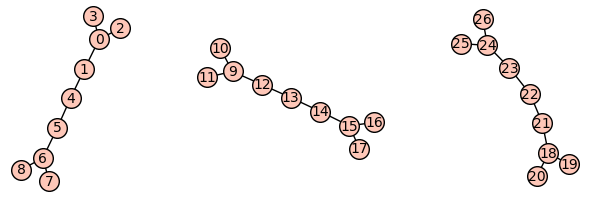

In [127]:
G_D8 = hole_diagramm(P_D8* delta)
print(f"Has double edges: {G_D8.has_multiple_edges()}")
G_D8.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [128]:
result_D8 = sph_two_design_test(P_D8* delta,c_D8* delta)
print_result(result_D8)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 27
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(1/7*sqrt(2), -9/14*sqrt(2), -1/7*sqrt(2), -1/7*sqrt(2), 3/14*sqrt(2), 1/7*sqrt(2), 9/14*sqrt(2), -3/14*sqrt(2), 1/7*sqrt(2), 1/7*sqrt(2), 9/14*sqrt(2), 9/14*sqrt(2), 1/7*sqrt(2), 1/7*sqrt(2), 9/14*sqrt(2), 9/14*sqrt(2), 1/7*sqrt(2), 1/7*sqrt(2), 3/14*sqrt(2), 3/14*sqrt(2), 1/7*sqrt(2), 1/7*sqrt(2), 3/14*sqrt(2), 3/14*sqrt(2))

The matrix of the spherical 2-design test:
[ 503/196   15/196  -13/196  -13/196   93/196  111/196   83/196    5/196   13/196   13/196  -15/196  -15/196   13/196   13/196  -15/196  -15/196   13/196   13/196   -5/196   -5/196   13/196   13/196   -5/196   -5/196]
[  15/196  545/196   83/196   83/196   47/196   15/196  -55/196   51/196   15/196   15/196   43/196   43/196   15/196   15/196   43/196   43/196   15/196   15/196  -51/196  -51/196   15/196   15/196  -51/196 

-----------------------------------------------------------------------------------------------------------------------

### $D_{10} E_7^{2}$ <a class="anchor" id="d_10"></a>

#### The Data
 $c_{D_{10}E_7^2} = \frac{1}{\sqrt8} \cdot \frac{1}{9} \cdot \begin{array}{|cc|cc|cc|}
\hline 
5   & 7 & 5 &  5  & 5 &5 \\
13  & 7 & 5 &  5  & 5 &5 \\
13  & 5 & 5 &  5  & 9 &7  \\
13  & 9 & 5 &  5  & 9 &7  \\
\hline 
\end{array}$ 

In [129]:
# The deep hole
c_D10E7 = (1/9) * vector([5,13,13,13, 7,7,5,9, 5,5,5,5, 5,5,5,5, 5,5,9,9, 5,5,7,7])


#p.502 Fig. 23.25 (a)
v_vectors = [
    leech_d("emp","p"),
    leech_d("I","h"),
    leech_d("II","h"),
    leech_d("III","h"),
    leech_d("C","p"),
    leech_d("8","p"),
    leech_d("80","l"),
    leech_d("80.14.23","p"),
    leech_d("14","l"),
    leech_d("82.03.14","p"),
    leech_d("83.02.14","p")
]
#p.502 Fig. 23.25 (b)
##Top
u_vectors = [
    leech_d("81.03.24","p"),
    leech_d("24","l"),
    leech_d("83.01.24","p"),
    leech_d("01","l"),
    leech_d("84.01.23","p"),
    leech_d("82.01.34","p"),
    leech_d("34","l"),
    leech_d("81.02.34","p")
]

##Bottom
x_vectors = [
    leech_d("84.03.12","p"),
    leech_d("12","l"),
    leech_d("83.04.12","p"),
    leech_d("04","l"),
    leech_d("81.04.23","p"),
    leech_d("82.04.13","p"),
    leech_d("13","l"),
    leech_d("84.02.13","p")
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors + x_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_D10E7 = matrix(all_vectors).transpose()


#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [130]:
leech_latt_controll_matrix(P_D10E7 )

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


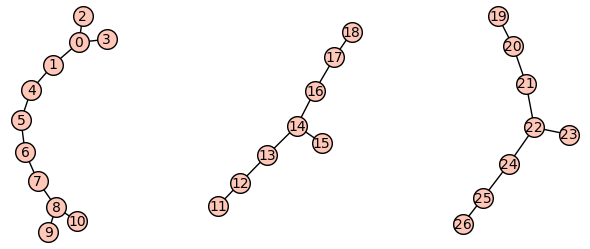

In [133]:
G_D10E7 = hole_diagramm(P_D10E7* delta)
print(f"Has double edges: {G_D10E7.has_multiple_edges()}")
G_D10E7.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [134]:
result_D10E7 = sph_two_design_test(P_D10E7* delta,c_D10E7* delta)
print_result(result_D10E7)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 27
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(1/2*sqrt(2), -1/2*sqrt(2), 0, 0, 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), -1/2*sqrt(2), 0, 0, 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 1/2*sqrt(2), 0, 0, 0, 0, 0, 0, 0, 0, 1/2*sqrt(2), 1/2*sqrt(2))

The matrix of the spherical 2-design test:
[101/36   7/36   1/18   1/18    1/3    1/3  11/36   5/36  -1/18  -1/18  -7/36  -7/36  -7/36  -7/36  -1/18  -1/18    4/9    4/9      0      0  -1/18  -1/18   -1/6   -1/6]
[  7/36 101/36    4/9    4/9    1/6    1/6 -11/36  -5/36   1/18   1/18   7/36   7/36   7/36   7/36   1/18   1/18   1/18   1/18      0      0   1/18   1/18   -1/3   -1/3]
[  1/18    4/9  31/12   7/12  -1/36  -1/36   1/18    1/9  -1/12  -1/12   1/18   1/18   1/18   1/18  -1/12  -1/12  -1/12  -1/12    1/4    1/4  -1/12  -1/12  -1/36  -1/36]
[  1/18    4/9   7/12  31/12  -1/36  -1/36   1/18 

------------------------------------------------------------------------------------------------------------------------

### $D_{12}^2$ <a class="anchor" id="d_12"></a>

#### The Data
 $c_{D_{12}^2} = \frac{1}{\sqrt8} \cdot \frac{1}{11} \cdot \begin{array}{|cc|cc|cc|}
\hline 
6   & 8 & 6 &  6  & 8 &6 \\
16  & 8 & 6 &  6  & 6 &6 \\
16  & 6 & 6 &  6  & 10 &10  \\
16  & 12 & 6 &  6  & 10 &8  \\
\hline 
\end{array}$ 

In [135]:
# The deep hole
c_D12 = (1/11) * vector([6,16,16,16, 8,8,6,12, 6,6,6,6, 6,6,6,6, 8,6,10,10, 6,6,10,8]) 

#p.502 Fig. 23.26 (a)
v_vectors = [
    leech_d("emp","p"),
    leech_d("I","h"),
    leech_d("II","h"),
    leech_d("III","h"),
    leech_d("C","p"),
    leech_d("8","p"),
    leech_d("80","l"),
    leech_d("80.14.23","p"),
    leech_d("14","l"),
    leech_d("82.03.14","p"),
    leech_d("03","l"),
    leech_d("81.03.24","p"),
    leech_d("84.03.12","p")
]
#p.502 Fig. 23.26 (b)
u_vectors = [
    leech_d("84.01.23","p"),
    leech_d("01","l"),
    leech_d("83.01.24","p"),
    leech_d("82.01.34","p"),
    leech_d("34","l"),
    leech_d("81.02.34","p"),
    leech_d("02","l"),
    leech_d("84.02.13","p"),
    leech_d("13","l"),
    leech_d("82.04.13","p"),
    leech_d("04","l"),
    leech_d("81.04.23","p"),
    leech_d("83.04.12","p")
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors

#Matrix with the Vectors of the Delauney Polytope (P,c)
P_D12 = Matrix(all_vectors).transpose()


#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [136]:
leech_latt_controll_matrix(P_D12)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


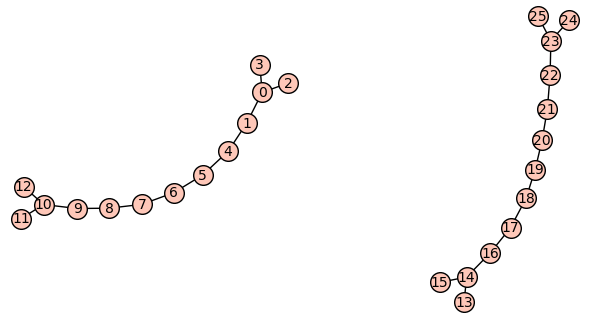

In [139]:
G_D12 = hole_diagramm(P_D12* delta)
print(f"Has double edges: {G_D12.has_multiple_edges()}")
G_D12.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [140]:
#Test for spherical 2-Design
result_D12 = sph_two_design_test(P_D12* delta,c_D12* delta)
print_result(result_D12)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 26
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(5/11*sqrt(2), -5/11*sqrt(2), 1/22*sqrt(2), 1/22*sqrt(2), 3/11*sqrt(2), 3/11*sqrt(2), 5/11*sqrt(2), -1/11*sqrt(2), -1/22*sqrt(2), 5/11*sqrt(2), 5/11*sqrt(2), -1/22*sqrt(2), 5/11*sqrt(2), -1/22*sqrt(2), 5/11*sqrt(2), -1/22*sqrt(2), 3/11*sqrt(2), 5/11*sqrt(2), 1/11*sqrt(2), 1/11*sqrt(2), -1/22*sqrt(2), -1/22*sqrt(2), 1/11*sqrt(2), 3/11*sqrt(2))

The matrix of the spherical 2-design test:
[337/121  26/121  19/242  19/242  57/121  57/121  69/242 -19/121 -19/242 -26/121 -26/121 -19/242 -26/121 -19/242 -26/121 -19/242  57/121  69/242  19/121  19/121 -19/242 -19/242 -83/242  -7/242]
[ 26/121 337/121  51/121  51/121   7/242   7/242 -69/242  19/121  19/242  26/121  26/121  19/242  26/121  19/242  26/121  19/242   7/242  26/121 -19/121 -19/121  19/242  19/242 -19/121 -57/121]
[ 19/242  51/121 619/2

-----------------------------------------------------------------------------------------------------------------------

### $D_{16} E_8$ <a class="anchor" id="d_16"></a>

#### The Data
 $c_{D_{16}E_8} = \frac{1}{\sqrt8} \cdot \frac{1}{15} \cdot \begin{array}{|cc|cc|cc|}
\hline 
8   & 12 & 10 &  8  & 10 &8 \\
22  & 10 & 8 &  8  & 8 &8 \\
22  & 8 & 8 &  8  & 14 &12  \\
22  & 16 & 8 &  8  & 14 &12  \\
\hline 
\end{array}$ 

In [141]:
# The deep hole
c_D16E8 = (1/15) * vector([8,22,22,22, 12,10,8,16, 10,8,8,8, 8,8,8,8, 10,8,14,14, 8,8,12,12]) 

#p.503 Fig. 23.27 (a) Vertices of D_16 diagramm / Fig. 23.20 p.498
v_vectors = [
    leech_d("emp","p"),
    leech_d("I","h"),
    leech_d("II","h"),
    leech_d("III","h"),
    leech_d("C","p"),
    leech_d("8","p"),
    leech_d("80","l"),
    leech_d("80.14.23","p"),
    leech_d("14","l"),
    leech_d("82.03.14","p"),
    leech_d("03","l"),
    leech_d("81.03.24","p"),
    leech_d("24","l"),
    leech_d("83.01.24","p"),
    leech_d("01","l"),
    leech_d("84.01.23","p"),
    leech_d("82.01.34","p")
]
#p.503 Fig. 23.27 (b) Vertices of E_8 diagramm
u_vectors = [
    leech_d("81.02.34","p"),
    leech_d("02","l"),
    leech_d("84.02.13","p"),
    leech_d("13","l"),
    leech_d("82.04.13","p"),
    leech_d("81.04.23","p"),
    leech_d("04","l"),
    leech_d("83.04.12","p"),
    leech_d("12","l")
]

# Combine all vectors into a single list
all_vectors = v_vectors + u_vectors
#Matrix with the Vectors of the Delauney Polytope (P,c)
P_D16E8 = matrix(all_vectors).transpose()

#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [142]:
leech_latt_controll_matrix(P_D16E8)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


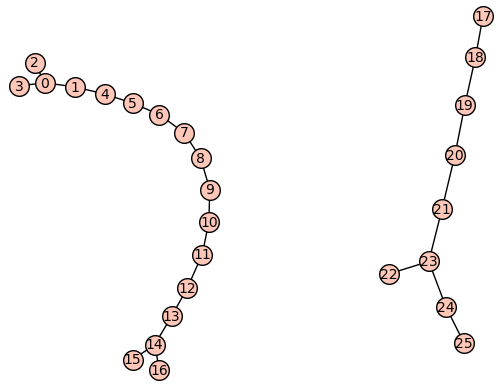

In [143]:
G_D16E8 = hole_diagramm(P_D16E8* delta)
print(f"Has double edges: {G_D16E8.has_multiple_edges()}")
G_D16E8.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [144]:
result_D16E8 = sph_two_design_test(P_D16E8* delta,c_D16E8* delta)
print_result(result_D16E8)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 26
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(17/60*sqrt(2), -17/60*sqrt(2), 13/60*sqrt(2), 13/60*sqrt(2), 1/20*sqrt(2), 5/12*sqrt(2), 17/60*sqrt(2), -11/60*sqrt(2), 5/12*sqrt(2), -13/60*sqrt(2), 17/60*sqrt(2), 17/60*sqrt(2), -13/60*sqrt(2), 17/60*sqrt(2), 17/60*sqrt(2), 17/60*sqrt(2), 5/12*sqrt(2), 17/60*sqrt(2), 11/60*sqrt(2), -19/60*sqrt(2), -13/60*sqrt(2), -13/60*sqrt(2), 1/20*sqrt(2), 11/20*sqrt(2))

The matrix of the spherical 2-design test:
[5039/1800  361/1800  121/1800  121/1800   217/600     37/72  539/1800 -137/1800      1/72 -121/1800 -361/1800 -361/1800 -121/1800 -361/1800 -361/1800 -361/1800     37/72  539/1800  137/1800  377/1800 -121/1800 -121/1800   -83/600  -163/600]
[ 361/1800 5039/1800  779/1800  779/1800    83/600     -1/72 -539/1800  137/1800     -1/72  121/1800  361/1800  361/1800  121/1800  361/1800  361/1800

-----------------------------------------------------------------------------------------------------------------------

### $D_{24}$ <a class="anchor" id="d_24"></a>

#### The Data
 $c_{D_{24}} = \frac{1}{\sqrt8} \cdot \frac{1}{23} \cdot \begin{array}{|cc|cc|cc|}
\hline 
12   & 18 & 14 &  12  & 16 &12 \\
34  & 16 & 12 &  12  & 12 &14 \\
34  & 12 & 12 &  12  & 20 &20  \\
34  & 24 & 12 &  12  & 22 &18  \\
\hline 
\end{array}$ 

In [145]:
#The deep hole
c_D24 = (1/23) * vector([12,34,34,34, 18,16,12,24, 14,12,12,12, 12,12,12,12, 16,12,20,22, 12,14,20,18])

#p.498 Fig. 23.20 D_n tree
all_vectors = [
    leech_d("emp","p"),
    leech_d("I","h"),
    leech_d("II","h"),
    leech_d("III","h"),
    leech_d("C","p"),
    leech_d("8","p"),
    leech_d("80","l"),
    leech_d("80.14.23","p"),
    leech_d("14","l"),
    leech_d("82.03.14","p"),
    leech_d("03","l"),
    leech_d("81.03.24","p"),
    leech_d("24","l"),
    leech_d("83.01.24","p"),
    leech_d("01","l"),
    leech_d("82.01.34","p"),
    
    leech_d("34","l"),
    leech_d("81.02.34","p"),
    leech_d("02","l"),
    leech_d("84.02.13","p"),
    leech_d("13","l"),
    leech_d("82.04.13","p"),
    leech_d("04","l"),
    leech_d("81.04.23","p"),
    leech_d("83.04.12","p"),
]
#Matrix with the Vectors of the Delauney Polytope (P,c)
P_D24 = Matrix(all_vectors).transpose()


#### Membership in $\sqrt8 \cdot \Lambda_{24}$

In [146]:
leech_latt_controll_matrix(P_D24)

True

#### The Resulting Hole Diagram of the Data

Has double edges: False


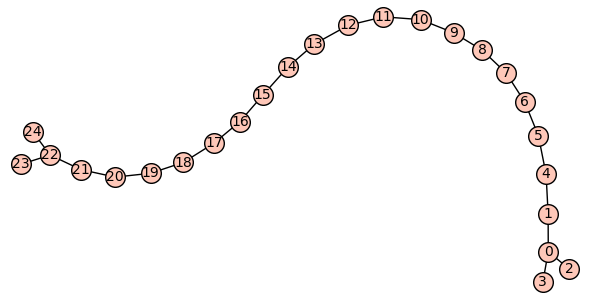

In [149]:
G_D24 = hole_diagramm(P_D24* delta)
print(f"Has double edges: {G_D24.has_multiple_edges()}")
G_D24.plot(vertex_labels=True,layout='spring')

#### The Spherical 2-Design Test

In [150]:
result_D24 = sph_two_design_test(P_D24* delta,c_D24* delta)
print_result(result_D24)

Is spherical 1-design: False
Is spherical 2-design: False

Number of points of the Delauney Polytope: 25
Dimension :  24
Distance to the deep hole: sqrt(2)

The vector of the spherical 1-design test: 
(11/46*sqrt(2), -11/46*sqrt(2), 6/23*sqrt(2), 6/23*sqrt(2), 5/46*sqrt(2), 7/46*sqrt(2), 11/46*sqrt(2), -1/46*sqrt(2), 9/46*sqrt(2), 11/46*sqrt(2), 11/46*sqrt(2), 11/46*sqrt(2), 11/46*sqrt(2), -6/23*sqrt(2), 11/46*sqrt(2), 11/46*sqrt(2), 7/46*sqrt(2), 11/46*sqrt(2), 3/46*sqrt(2), 1/46*sqrt(2), -6/23*sqrt(2), 9/46*sqrt(2), 3/46*sqrt(2), 5/46*sqrt(2))

The matrix of the spherical 2-design test:
[5871/2116  477/2116  201/2116  201/2116  745/2116 1043/2116  581/2116 -149/2116  283/2116 -477/2116 -477/2116 -477/2116 -477/2116 -201/2116 -477/2116 -477/2116 1043/2116  581/2116  447/2116  149/2116 -201/2116  283/2116 -611/2116 -313/2116]
[ 477/2116 5871/2116  857/2116  857/2116  313/2116   15/2116 -581/2116  149/2116 -283/2116  477/2116  477/2116  477/2116  477/2116  201/2116  477/2116  477/2116  

-------------------------------------------------------------------------------------------------------------------------